0_neda_mimfpt_all_classification_models

Engin Abdan

### Import

In [2]:
import pandas as pd
import numpy as np
from numpy import percentile

import matplotlib.pyplot as plt
from matplotlib.pyplot import matplotlib
import plotly.express as px
from mpl_toolkits.mplot3d import Axes3D 
import seaborn as sns

import scipy.stats as stats
from scipy.stats import skew
from scipy.stats import zscore

from sklearn.preprocessing import PolynomialFeatures 
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import Lasso, LassoCV 
from sklearn.linear_model import ElasticNet, ElasticNetCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve, roc_auc_score, auc, roc_curve
from sklearn.metrics import SCORERS
from sklearn.metrics import make_scorer

from yellowbrick.regressor import ResidualsPlot
from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ClassificationReport
from yellowbrick.classifier import ClassPredictionError

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

pd.set_option('display.float_format', lambda x: '%.2f' % x)
# plt.style.use('classic')
sns.set_style("white")

### Data

In [3]:
df = pd.read_excel("std_ins_ml_data.xlsx")

### Data Info

In [4]:
df.head(2)

,Unnamed: 0,Ling_Int,Math_Int,Spa_Int,Mus_Int,Nat_Int,Body_Int,Interp_Int,Intrap_Int,Plt_Or_Not,Flight_Mean,MI_Cat
0,0,20,19,10,16,13,16,17,22,1,95,Intrap
1,1,12,18,26,13,22,17,17,14,0,68,Spa


In [5]:
df = df.drop(columns=["Unnamed: 0","MI_Cat"], axis=1)
df.head(2)

,Ling_Int,Math_Int,Spa_Int,Mus_Int,Nat_Int,Body_Int,Interp_Int,Intrap_Int,Plt_Or_Not,Flight_Mean
0,20,19,10,16,13,16,17,22,1,95
1,12,18,26,13,22,17,17,14,0,68


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Ling_Int,100.00,17.72,3.07,11.00,16.00,17.00,20.00,26.00
Math_Int,100.00,17.75,3.66,10.00,15.00,17.00,19.00,33.00
Spa_Int,100.00,17.81,3.05,10.00,15.75,17.50,20.00,26.00
Mus_Int,100.00,17.86,3.11,10.00,16.00,17.50,20.00,26.00
Nat_Int,100.00,18.16,3.74,10.00,15.75,18.00,20.00,33.00
Body_Int,100.00,17.20,2.67,10.00,15.00,17.00,19.00,23.00
Interp_Int,100.00,17.78,2.87,12.00,16.00,18.00,19.00,26.00
Intrap_Int,100.00,18.07,2.88,13.00,16.00,18.00,20.00,26.00
Plt_Or_Not,100.00,0.58,0.50,0.00,0.00,1.00,1.00,1.00
Flight_Mean,100.00,75.00,12.09,55.00,63.75,75.00,86.00,98.00


In [7]:
type(df.corr())

pandas.core.frame.DataFrame

In [8]:
df.corr()

,Ling_Int,Math_Int,Spa_Int,Mus_Int,Nat_Int,Body_Int,Interp_Int,Intrap_Int,Plt_Or_Not,Flight_Mean
Ling_Int,1.00,-0.10,0.00,-0.07,-0.10,0.10,0.01,0.12,-0.09,-0.08
Math_Int,-0.10,1.00,0.00,0.26,0.09,-0.02,0.09,-0.08,0.07,0.07
Spa_Int,0.00,0.00,1.00,-0.04,0.05,0.04,-0.01,-0.08,-0.21,-0.18
Mus_Int,-0.07,0.26,-0.04,1.00,0.01,-0.06,-0.01,-0.17,0.07,0.06
Nat_Int,-0.10,0.09,0.05,0.01,1.00,-0.22,-0.20,-0.10,-0.05,-0.09
Body_Int,0.10,-0.02,0.04,-0.06,-0.22,1.00,0.20,0.02,-0.07,-0.01
Interp_Int,0.01,0.09,-0.01,-0.01,-0.20,0.20,1.00,0.09,-0.06,0.05
Intrap_Int,0.12,-0.08,-0.08,-0.17,-0.10,0.02,0.09,1.00,-0.07,-0.04
Plt_Or_Not,-0.09,0.07,-0.21,0.07,-0.05,-0.07,-0.06,-0.07,1.00,0.87
Flight_Mean,-0.08,0.07,-0.18,0.06,-0.09,-0.01,0.05,-0.04,0.87,1.00


In [9]:
a = []
b = []
for i in df.corr().columns:
    for k in df.corr().loc[:,i]:
        if abs(k) >= 0.9:
            a.append(k)
        else:
            b.append(k)
print(f"Strong_Corr \t: {a}" )
print(f"Weak_Corr \t: {b}" )

Strong_Corr 	: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
Weak_Corr 	: [-0.09816177013828017, 0.0007345371969964949, -0.06869758318601726, -0.10341241733168519, 0.10058716704061625, 0.012450765314076791, 0.12474118582100657, -0.09131340981215223, -0.08030683262756651, -0.09816177013828017, 0.00476069688227437, 0.2633867913064584, 0.08790512890900118, -0.023800528475231113, 0.08726130236731322, -0.080007990412849, 0.06963578663429645, 0.07289999704889377, 0.0007345371969964949, 0.00476069688227437, -0.04332371252478464, 0.05408424555732783, 0.04319435622124602, -0.010617072664902864, -0.07915988683685925, -0.20701074274195216, -0.18036477258454398, -0.06869758318601726, 0.2633867913064584, -0.04332371252478464, 0.006284241754908033, -0.057391533213293315, -0.014819307828657707, -0.17167099025671959, 0.07279043658679342, 0.06149210698189992, -0.10341241733168519, 0.08790512890900118, 0.05408424555732783, 0.006284241754908033, -0.21658244632805532, -0.20207143994751595, -0.1024704

In [10]:
df.head(1)

,Ling_Int,Math_Int,Spa_Int,Mus_Int,Nat_Int,Body_Int,Interp_Int,Intrap_Int,Plt_Or_Not,Flight_Mean
0,20,19,10,16,13,16,17,22,1,95


In [11]:
df.Plt_Or_Not.unique()

array([1, 0], dtype=int64)

In [12]:
df.Plt_Or_Not.value_counts()

1    58
0    42
Name: Plt_Or_Not, dtype: int64

In [13]:
df.Flight_Mean.unique()

array([95, 68, 87, 66, 62, 84, 63, 58, 77, 75, 74, 79, 88, 89, 67, 59, 76,
       65, 96, 73, 61, 60, 57, 91, 80, 72, 93, 64, 97, 86, 78, 92, 90, 56,
       55, 85, 98, 83], dtype=int64)

In [14]:
df.Flight_Mean.nunique()

38

In [15]:
len(df)

100

In [16]:
df.head(1)

,Ling_Int,Math_Int,Spa_Int,Mus_Int,Nat_Int,Body_Int,Interp_Int,Intrap_Int,Plt_Or_Not,Flight_Mean
0,20,19,10,16,13,16,17,22,1,95


### Skewness

In [17]:
x = df.drop(columns=["Plt_Or_Not", "Flight_Mean"]).columns
for i in x:
    if skew(df[i]) >= -0.5 and skew(df[i]) < 0.5:
        print(f"{i} \t: {skew(df[i])} \t>>> Normal")
    elif skew(df[i]) >= 0.5 and skew(df[i]) < 1.0:
        print(f"{i} \t: {skew(df[i])} \t>>> Moderate")
    elif skew(df[i]) >= 1.0:
        print(f"{i} \t: {skew(df[i])} \t>>> Skewed")              

Ling_Int 	: 0.12059345356069898 	>>> Normal
Math_Int 	: 1.3051123209475743 	>>> Skewed
Spa_Int 	: 0.2115483275849964 	>>> Normal
Mus_Int 	: 0.32126133203604673 	>>> Normal
Nat_Int 	: 0.8025455431140828 	>>> Moderate
Body_Int 	: 0.16184329645515394 	>>> Normal
Interp_Int 	: 0.22759596608919014 	>>> Normal
Intrap_Int 	: 0.12173869243645632 	>>> Normal


### Heatmap

In [18]:
# plt.figure(figsize=(20,10))
# sns.heatmap(stu.corr(), annot=True, cmap="BrBG")
# plt.tight_layout();

### Pairplot

In [19]:
#sns.pairplot(stu,hue="Plt_Or_Not");

### Corr With Plt_Or_Not

<AxesSubplot:>

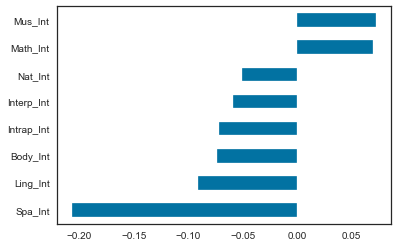

In [20]:
df.corr()["Plt_Or_Not"].drop(["Plt_Or_Not", "Flight_Mean"]).sort_values().plot.barh()

### Train Test

In [21]:
from sklearn.model_selection import train_test_split

X = df.drop(["Plt_Or_Not","Flight_Mean"], axis=1)
y = df["Plt_Or_Not"]
print(f"X_shape \t: {X.shape}")
print(f"y_shape \t: {y.shape}")
print("-"*40)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(f"X_tain_shape \t: {X_train.shape}")
print(f"X_test_shape \t: {X_test.shape}")
print(f"y_tain_shape \t: {y_train.shape}")
print(f"y_test_shape \t: {y_test.shape}")

X_shape 	: (100, 8)
y_shape 	: (100,)
----------------------------------------
X_tain_shape 	: (70, 8)
X_test_shape 	: (30, 8)
y_tain_shape 	: (70,)
y_test_shape 	: (30,)


### Scaling

In [22]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# MinMaxScaler for X data
scaler_mms = MinMaxScaler ()
X_train_mms = scaler_mms.fit_transform(X_train)
X_test_mms = scaler_mms.transform(X_test)

# StandardScaler for X data
scaler_ss = StandardScaler()
X_train_ss = scaler_ss.fit_transform(X_train)
X_test_ss = scaler_ss.transform(X_test)

### Polyfit

In [23]:
X.head(1)

,Ling_Int,Math_Int,Spa_Int,Mus_Int,Nat_Int,Body_Int,Interp_Int,Intrap_Int
0,20,19,10,16,13,16,17,22


In [24]:
def check_dist(X, var):
    plt.subplot(1, 2, 1)
    sns.histplot(x=var, data=X)
    plt.subplot(1, 2, 2)
    stats.probplot(df[var], dist="norm", plot=plt)
    plt.tight_layout()
    plt.show()

In [25]:
# for col in X.columns:
#     check_dist(X, col)

In [26]:
np.polyfit(X.Ling_Int, y, deg=3)
# b3--b2--b1--b0

array([-9.00889449e-04,  4.58537275e-02, -7.68853551e-01,  4.84076850e+00])

### PolynomialFeatures

In [27]:
from sklearn.preprocessing import PolynomialFeatures
poly_trans = PolynomialFeatures(degree=3, include_bias=False)
poly_data = poly_trans.fit_transform(X)
print(poly_data.shape)
print(X.shape)

(100, 164)
(100, 8)


## Logistic Regression

### Logistic Regression & Optimal Threshold

In [28]:
# log_model & Not Scaled & Optimal Threshold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

log_model = LogisticRegression(random_state=42)
log_model.fit(X_train, y_train)

y_test_pr = log_model.predict(X_test)
y_test_prd_prb = pd.Series(log_model.predict_proba(X_test)[:,1])

y_train_prd_prb = log_model.predict_proba(X_train)
roc_auc_score(y_train, y_train_prd_prb[:,1])
fp_rate, tp_rate, thresholds = roc_curve(y_train, y_train_prd_prb[:,1])
optimal_idx = np.argmax(tp_rate - fp_rate)
optimal_threshold_rac = thresholds[optimal_idx]
y_test_prd = y_test_prd_prb.apply(lambda x : 1 if x >= optimal_threshold_rac else 0)

log_scores = {"lr": {"acc" : round(accuracy_score(y_test, y_test_prd), 2),
                     "prc" : round(precision_score(y_test, y_test_prd, pos_label=1), 2),
                     "rec" : round(recall_score(y_test, y_test_prd, pos_label=1), 2),
                     "f1s" : round(f1_score(y_test, y_test_prd, pos_label=1), 2),
                     "roc" : round(roc_auc_score(y_test, y_test_prd), 2)}}

lr_scr = pd.DataFrame(log_scores, index=["acc","prc","rec","f1s", "roc"])
lr_scr

,lr
acc,0.53
prc,0.50
rec,0.71
f1s,0.59
roc,0.54


In [29]:
# log_model & MinMax Scaled & Optimal Threshold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

log_model = LogisticRegression(random_state=42)
log_model.fit(X_train_mms, y_train)

y_test_prd = log_model.predict(X_test_mms)
y_test_prd_prb = pd.Series(log_model.predict_proba(X_test_mms)[:,1])

y_train_prd_prb = log_model.predict_proba(X_train_mms)
roc_auc_score(y_train, y_train_prd_prb[:,1])
fp_rate, tp_rate, thresholds = roc_curve(y_train, y_train_prd_prb[:,1])
optimal_idx = np.argmax(tp_rate - fp_rate)
optimal_threshold_rac = thresholds[optimal_idx]
y_test_prd = y_test_prd_prb.apply(lambda x : 1 if x >= optimal_threshold_rac else 0)

log_scores = {"lr_mms": {"acc" : round(accuracy_score(y_test, y_test_prd), 2),
                         "prc" : round(precision_score(y_test, y_test_prd, pos_label=1), 2),
                         "rec" : round(recall_score(y_test, y_test_prd, pos_label=1), 2),
                         "f1s" : round(f1_score(y_test, y_test_prd, pos_label=1), 2),
                         "roc" : round(roc_auc_score(y_test, y_test_prd), 2)}}

lr_mms_scr = pd.DataFrame(log_scores, index=["acc","prc","rec","f1s", "roc"])
lr_mms_scr

,lr_mms
acc,0.50
prc,0.48
rec,0.86
f1s,0.62
roc,0.52


In [30]:
# log_model & Standard Scaled & Optimal Threshold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

log_model = LogisticRegression(random_state=42)
log_model.fit(X_train_ss, y_train)

y_test_prd = log_model.predict(X_test_ss)
y_test_prd_prb = pd.Series(log_model.predict_proba(X_test_ss)[:,1])

y_train_prd_prb = log_model.predict_proba(X_train_ss)
roc_auc_score(y_train, y_train_prd_prb[:,1])
fp_rate, tp_rate, thresholds = roc_curve(y_train, y_train_prd_prb[:,1])
optimal_idx = np.argmax(tp_rate - fp_rate)
optimal_threshold_rac = thresholds[optimal_idx]
y_test_prd = y_test_prd_prb.apply(lambda x : 1 if x >= optimal_threshold_rac else 0)

log_scores = {"lr_ss": {"acc" : round(accuracy_score(y_test, y_test_prd), 2),
                        "prc" : round(precision_score(y_test, y_test_prd, pos_label=1), 2),
                        "rec" : round(recall_score(y_test, y_test_prd, pos_label=1), 2),
                        "f1s" : round(f1_score(y_test, y_test_prd, pos_label=1), 2),
                        "roc" : round(roc_auc_score(y_test, y_test_prd), 2)}}

lr_ss_scr = pd.DataFrame(log_scores, index=["acc","prc","rec","f1s", "roc"])
lr_ss_scr

,lr_ss
acc,0.53
prc,0.50
rec,0.71
f1s,0.59
roc,0.54


In [31]:
lr_def_scrs = pd.concat([lr_scr, lr_mms_scr, lr_ss_scr], axis=1)
lr_def_scrs

,lr,lr_mms,lr_ss
acc,0.53,0.50,0.53
prc,0.50,0.48,0.50
rec,0.71,0.86,0.71
f1s,0.59,0.62,0.59
roc,0.54,0.52,0.54


### Logistic Regression & GridSearchCV & Optimal Threshold

In [32]:
# log_model & Not Scaled & GridSearchCV & Optimal Threshold
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
log_model = LogisticRegression(random_state=42)

penalty = ["l1", "l2", "elasticnet"]
l1_ratio = np.linspace(0, 1, 20)
C = np.logspace(0, 10, 20)
param_grid = {"penalty" : penalty,
              "l1_ratio" : l1_ratio,
              "C" : C}

lm_grd = GridSearchCV(estimator=log_model,
                      param_grid=param_grid)

lm_grd.fit(X_train, y_train)
y_test_prd = lm_grd.predict(X_test)
y_test_prd_prb = pd.Series(lm_grd.predict_proba(X_test)[:,1])

y_train_prd_prb = lm_grd.predict_proba(X_train)
roc_auc_score(y_train, y_train_prd_prb[:,1])
fp_rate, tp_rate, thresholds = roc_curve(y_train, y_train_prd_prb[:,1])
optimal_idx = np.argmax(tp_rate - fp_rate)
optimal_threshold_rac = thresholds[optimal_idx]
y_test_prd = y_test_prd_prb.apply(lambda x : 1 if x >= optimal_threshold_rac else 0)

log_scores = {"lr_grd": {"acc" : round(accuracy_score(y_test, y_test_prd), 2),
                         "prc" : round(precision_score(y_test, y_test_prd, pos_label=1), 2),
                         "rec" : round(recall_score(y_test, y_test_prd, pos_label=1), 2),
                         "f1s" : round(f1_score(y_test, y_test_prd, pos_label=1), 2),
                         "roc" : round(roc_auc_score(y_test, y_test_prd), 2)}}

lr_scr = pd.DataFrame(log_scores, index=["acc","prc","rec","f1s", "roc"])
lr_scr

,lr_grd
acc,0.53
prc,0.50
rec,0.71
f1s,0.59
roc,0.54


In [33]:
# log_model & MinMax Scaled & GridSearchCV & Optimal Threshold
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
log_model = LogisticRegression(random_state=42)

penalty = ["l1", "l2", "elasticnet"]
l1_ratio = np.linspace(0, 1, 20)
C = np.logspace(0, 10, 20)
param_grid = {"penalty" : penalty,
              "l1_ratio" : l1_ratio,
              "C" : C}

lm_grd = GridSearchCV(estimator=log_model,
                      param_grid=param_grid)

lm_grd.fit(X_train_mms, y_train)

y_test_prd = lm_grd.predict(X_test_mms)
y_test_prd_prb = pd.Series(lm_grd.predict_proba(X_test_mms)[:,1])

y_train_prd_prb = lm_grd.predict_proba(X_train_mms)
roc_auc_score(y_train, y_train_prd_prb[:,1])
fp_rate, tp_rate, thresholds = roc_curve(y_train, y_train_prd_prb[:,1])
optimal_idx = np.argmax(tp_rate - fp_rate)
optimal_threshold_rac = thresholds[optimal_idx]
y_test_prd = y_test_prd_prb.apply(lambda x : 1 if x >= optimal_threshold_rac else 0)

log_scores = {"lr_grd_mms": {"acc" : round(accuracy_score(y_test, y_test_prd), 2),
                             "prc" : round(precision_score(y_test, y_test_prd, pos_label=1), 2),
                             "rec" : round(recall_score(y_test, y_test_prd, pos_label=1), 2),
                             "f1s" : round(f1_score(y_test, y_test_prd, pos_label=1), 2),
                             "roc" : round(roc_auc_score(y_test, y_test_prd), 2)}}

lr_mms_scr = pd.DataFrame(log_scores, index=["acc","prc","rec","f1s", "roc"])
lr_mms_scr

,lr_grd_mms
acc,0.50
prc,0.48
rec,0.86
f1s,0.62
roc,0.52


In [34]:
# log_model & Standard Scaled & GridSearchCV & Optimal Threshold
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
log_model = LogisticRegression(random_state=42)

penalty = ["l1", "l2", "elasticnet"]
l1_ratio = np.linspace(0, 1, 20)
C = np.logspace(0, 10, 20)
param_grid = {"penalty" : penalty,
              "l1_ratio" : l1_ratio,
              "C" : C}

lm_grd = GridSearchCV(estimator=log_model,
                      param_grid=param_grid)

lm_grd.fit(X_train_ss, y_train)

y_test_prd = lm_grd.predict(X_test_ss)
y_test_prd_prb = pd.Series(lm_grd.predict_proba(X_test_ss)[:,1])

y_train_prd_prb = lm_grd.predict_proba(X_train_ss)
roc_auc_score(y_train, y_train_prd_prb[:,1])
fp_rate, tp_rate, thresholds = roc_curve(y_train, y_train_prd_prb[:,1])
optimal_idx = np.argmax(tp_rate - fp_rate)
optimal_threshold_rac = thresholds[optimal_idx]
y_test_prd = y_test_prd_prb.apply(lambda x : 1 if x >= optimal_threshold_rac else 0)

log_scores = {"lr_grd_ss": {"acc" : round(accuracy_score(y_test, y_test_prd), 2),
                            "prc" : round(precision_score(y_test, y_test_prd, pos_label=1), 2),
                            "rec" : round(recall_score(y_test, y_test_prd, pos_label=1), 2),
                            "f1s" : round(f1_score(y_test, y_test_prd, pos_label=1), 2),
                            "roc" : round(roc_auc_score(y_test, y_test_prd), 2)}}

lr_ss_scr = pd.DataFrame(log_scores, index=["acc","prc","rec","f1s", "roc"])
lr_ss_scr

,lr_grd_ss
acc,0.53
prc,0.50
rec,0.71
f1s,0.59
roc,0.54


In [35]:
lr_grd_scrs = pd.concat([lr_scr, lr_mms_scr, lr_ss_scr], axis=1)
lr_grd_scrs

,lr_grd,lr_grd_mms,lr_grd_ss
acc,0.53,0.50,0.53
prc,0.50,0.48,0.50
rec,0.71,0.86,0.71
f1s,0.59,0.62,0.59
roc,0.54,0.52,0.54


In [36]:
lr_mid_scrs = pd.concat([lr_def_scrs, lr_grd_scrs], axis=1)
lr_mid_scrs.columns = ["lr","lr_grd","lr_mms","lr_grd_mms","lr_ss","lr_grd_ss"]
lr_mid_scrs

,lr,lr_grd,lr_mms,lr_grd_mms,lr_ss,lr_grd_ss
acc,0.53,0.50,0.53,0.53,0.50,0.53
prc,0.50,0.48,0.50,0.50,0.48,0.50
rec,0.71,0.86,0.71,0.71,0.86,0.71
f1s,0.59,0.62,0.59,0.59,0.62,0.59
roc,0.54,0.52,0.54,0.54,0.52,0.54


### Logistic Regression & CV

In [37]:
# log_model & Not Scaled & CV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate

model = LogisticRegression(random_state=42)

scores = cross_validate(model,
                        X_train,
                        y_train,
                        scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc'],
                        cv = 10)
lr_cv_scr = pd.DataFrame(scores, index = range(1, 11))
lr_cv_scr = lr_cv_scr.mean()[2:]
lr_cv_scr

test_accuracy    0.56
test_precision   0.59
test_recall      0.81
test_f1          0.68
test_roc_auc     0.45
dtype: float64

In [38]:
# log_model & MinMax Scaled & CV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate

model = LogisticRegression(random_state=42)

scores = cross_validate(model,
                        X_train_mms,
                        y_train,
                        scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc'],
                        cv = 10)
lr_mms_cv_scr = pd.DataFrame(scores, index = range(1, 11))
lr_mms_cv_scr = lr_mms_cv_scr.mean()[2:]
lr_mms_cv_scr

test_accuracy    0.61
test_precision   0.62
test_recall      0.97
test_f1          0.76
test_roc_auc     0.43
dtype: float64

In [39]:
# log_model & Standard Scaled & CV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate

model = LogisticRegression(random_state=42)

scores = cross_validate(model,
                        X_train_ss,
                        y_train,
                        scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc'],
                        cv = 10)
lr_ss_cv_scr = pd.DataFrame(scores, index = range(1, 11))
lr_ss_cv_scr = lr_ss_cv_scr.mean()[2:]
lr_ss_cv_scr

test_accuracy    0.57
test_precision   0.60
test_recall      0.83
test_f1          0.69
test_roc_auc     0.43
dtype: float64

In [40]:
lr_cv_scrs = pd.concat([lr_cv_scr, lr_mms_cv_scr, lr_ss_cv_scr], axis=1)
lr_cv_scrs.rename(columns={0:"lr_cv",
                           1:"lr_cv_mms",
                           2:"lr_cv_ss"},
                       index={"test_accuracy":"acc",
                              "test_precision":"prc",
                              "test_recall":"rec",
                              "test_f1":"f1s",
                              "test_roc_auc":"roc"},
                       inplace=True)
lr_cv_scrs

,lr_cv,lr_cv_mms,lr_cv_ss
acc,0.56,0.61,0.57
prc,0.59,0.62,0.60
rec,0.81,0.97,0.83
f1s,0.68,0.76,0.69
roc,0.45,0.43,0.43


In [41]:
lr_cum_scrs = pd.concat([lr_def_scrs, lr_grd_scrs, lr_cv_scrs], axis=1)
lr_cum_scrs.columns = ["lr","lr_grd","lr_cv","lr_mms","lr_grd_mms","lr_cv_mms","lr_ss","lr_grd_ss","lr_cv_ss"]
lr_cum_scrs

,lr,lr_grd,lr_cv,lr_mms,lr_grd_mms,lr_cv_mms,lr_ss,lr_grd_ss,lr_cv_ss
acc,0.53,0.50,0.53,0.53,0.50,0.53,0.56,0.61,0.57
prc,0.50,0.48,0.50,0.50,0.48,0.50,0.59,0.62,0.60
rec,0.71,0.86,0.71,0.71,0.86,0.71,0.81,0.97,0.83
f1s,0.59,0.62,0.59,0.59,0.62,0.59,0.68,0.76,0.69
roc,0.54,0.52,0.54,0.54,0.52,0.54,0.45,0.43,0.43


## KNN

### KNN & Elbow & "k"

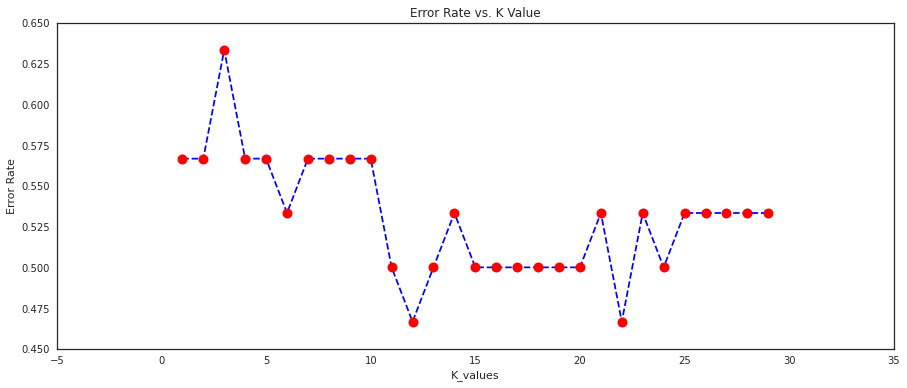

In [42]:
# knn_model & Not Scaled & Best "k"
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

test_error_rates = []
for k in range(1,30):
    knn_model = KNeighborsClassifier(n_neighbors=k, p =1, weights="uniform")
    knn_model.fit(X_train, y_train) 
    pred = knn_model.predict(X_test)
    test_error = 1 - accuracy_score(y_test, pred)
    test_error_rates.append(test_error)

plt.figure(figsize=(15,6))
plt.plot(range(1,30),
         test_error_rates,
         color='blue',
         linestyle='--',
         marker='o',
         markerfacecolor='red',
         markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K_values')
plt.ylabel('Error Rate')
plt.style.use('classic')
#sns.set_style("white")
# Best "k"=5=Default

### KNN & Optimal Threshold

In [43]:
# knn_model & Not Scaled & Optimal Threshold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

y_test_prd = knn_model.predict(X_test)
y_test_prd_prb = pd.Series(knn_model.predict_proba(X_test)[:,1])

y_train_prd_prb = knn_model.predict_proba(X_train)
roc_auc_score(y_train, y_train_prd_prb[:,1])
fp_rate, tp_rate, thresholds = roc_curve(y_train, y_train_prd_prb[:,1])
optimal_idx = np.argmax(tp_rate - fp_rate)
optimal_threshold_rac = thresholds[optimal_idx]
y_test_prd = y_test_prd_prb.apply(lambda x : 1 if x >= optimal_threshold_rac else 0)

knn_scores = {"knn": {"acc" : round(accuracy_score(y_test, y_test_prd), 2),
                      "prc" : round(precision_score(y_test, y_test_prd, pos_label=1), 2),
                      "rec" : round(recall_score(y_test, y_test_prd, pos_label=1), 2),
                      "f1s" : round(f1_score(y_test, y_test_prd, pos_label=1), 2),
                      "roc" : round(roc_auc_score(y_test, y_test_prd), 2)}}

knn_scr = pd.DataFrame(knn_scores, index=["acc","prc","rec","f1s", "roc"])
knn_scr

,knn
acc,0.40
prc,0.42
rec,0.79
f1s,0.55
roc,0.42


In [44]:
# knn_model & MinMax Scaled & Optimal Threshold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn_model = KNeighborsClassifier()
knn_model.fit(X_train_mms, y_train)

y_test_prd = knn_model.predict(X_test_mms)
y_test_prd_prb = pd.Series(knn_model.predict_proba(X_test_mms)[:,1])

y_train_prd_prb = knn_model.predict_proba(X_train_mms)
roc_auc_score(y_train, y_train_prd_prb[:,1])
fp_rate, tp_rate, thresholds = roc_curve(y_train, y_train_prd_prb[:,1])
optimal_idx = np.argmax(tp_rate - fp_rate)
optimal_threshold_rac = thresholds[optimal_idx]
y_test_prd = y_test_prd_prb.apply(lambda x : 1 if x >= optimal_threshold_rac else 0)

knn_scores = {"knn_mms": {"acc" : round(accuracy_score(y_test, y_test_prd), 2),
                          "prc" : round(precision_score(y_test, y_test_prd, pos_label=1), 2),
                          "rec" : round(recall_score(y_test, y_test_prd, pos_label=1), 2),
                          "f1s" : round(f1_score(y_test, y_test_prd, pos_label=1), 2),
                          "roc" : round(roc_auc_score(y_test, y_test_prd), 2)}}

knn_mms_scr = pd.DataFrame(knn_scores, index=["acc","prc","rec","f1s", "roc"])
knn_mms_scr

,knn_mms
acc,0.43
prc,0.41
rec,0.50
f1s,0.45
roc,0.44


In [45]:
# knn_model & Standard Scaled & Optimal Threshold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn_model = KNeighborsClassifier()
knn_model.fit(X_train_ss, y_train)

y_test_prd = knn_model.predict(X_test_ss)
y_test_prd_prb = pd.Series(knn_model.predict_proba(X_test_ss)[:,1])

y_train_prd_prb = knn_model.predict_proba(X_train_ss)
roc_auc_score(y_train, y_train_prd_prb[:,1])
fp_rate, tp_rate, thresholds = roc_curve(y_train, y_train_prd_prb[:,1])
optimal_idx = np.argmax(tp_rate - fp_rate)
optimal_threshold_rac = thresholds[optimal_idx]
y_test_prd = y_test_prd_prb.apply(lambda x : 1 if x >= optimal_threshold_rac else 0)

knn_scores = {"knn_ss": {"acc" : round(accuracy_score(y_test, y_test_prd), 2),
                         "prc" : round(precision_score(y_test, y_test_prd, pos_label=1), 2),
                         "rec" : round(recall_score(y_test, y_test_prd, pos_label=1), 2),
                         "f1s" : round(f1_score(y_test, y_test_prd, pos_label=1), 2),
                         "roc" : round(roc_auc_score(y_test, y_test_prd), 2)}}

knn_ss_scr = pd.DataFrame(knn_scores, index=["acc","prc","rec","f1s", "roc"])
knn_ss_scr

,knn_ss
acc,0.40
prc,0.42
rec,0.71
f1s,0.53
roc,0.42


In [46]:
knn_def_scrs = pd.concat([knn_scr, knn_mms_scr, knn_ss_scr], axis=1)
knn_def_scrs

,knn,knn_mms,knn_ss
acc,0.40,0.43,0.40
prc,0.42,0.41,0.42
rec,0.79,0.50,0.71
f1s,0.55,0.45,0.53
roc,0.42,0.44,0.42


### KNN & GridSearchCV & Optimal Threshold

In [47]:
# knn_model & Not Scaled & GridSearchCV & Optimal Threshold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

knn_model = KNeighborsClassifier()
k_values= range(1,30)
param_grid = {"n_neighbors":k_values,
              "p": [1,2],
              "weights": ['uniform', "distance"]}
knn_grd = GridSearchCV(knn_model, param_grid, cv=10, scoring= 'accuracy')

knn_grd.fit(X_train, y_train)
y_test_prd = knn_grd.predict(X_test)
y_test_prd_prb = pd.Series(knn_grd.predict_proba(X_test)[:,1])

y_train_prd_prb = knn_grd.predict_proba(X_train)
roc_auc_score(y_train, y_train_prd_prb[:,1])
fp_rate, tp_rate, thresholds = roc_curve(y_train, y_train_prd_prb[:,1])
optimal_idx = np.argmax(tp_rate - fp_rate)
optimal_threshold_rac = thresholds[optimal_idx]
y_test_prd = y_test_prd_prb.apply(lambda x : 1 if x >= optimal_threshold_rac else 0)

knn_scores = {"knn_grd": {"acc" : round(accuracy_score(y_test, y_test_prd), 2),
                          "prc" : round(precision_score(y_test, y_test_prd, pos_label=1), 2),
                          "rec" : round(recall_score(y_test, y_test_prd, pos_label=1), 2),
                          "f1s" : round(f1_score(y_test, y_test_prd, pos_label=1), 2),
                          "roc" : round(roc_auc_score(y_test, y_test_prd), 2)}}

knn_scr = pd.DataFrame(knn_scores, index=["acc","prc","rec","f1s", "roc"])
print(knn_grd.best_params_)
knn_scr

{'n_neighbors': 5, 'p': 2, 'weights': 'distance'}


,knn_grd
acc,0.57
prc,0.67
rec,0.14
f1s,0.24
roc,0.54


In [48]:
# knn_model & MinMax Scaled & GridSearchCV & Optimal Threshold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

knn_model = KNeighborsClassifier()
k_values= range(1,30)
param_grid = {"n_neighbors":k_values,
              "p": [1,2],
              "weights": ['uniform', "distance"]}
knn_grd = GridSearchCV(knn_model, param_grid, cv=10, scoring= 'accuracy')

knn_grd.fit(X_train_mms, y_train)
y_test_prd = knn_grd.predict(X_test_mms)
y_test_prd_prb = pd.Series(knn_grd.predict_proba(X_test_mms)[:,1])

y_train_prd_prb = knn_grd.predict_proba(X_train_mms)
roc_auc_score(y_train, y_train_prd_prb[:,1])
fp_rate, tp_rate, thresholds = roc_curve(y_train, y_train_prd_prb[:,1])
optimal_idx = np.argmax(tp_rate - fp_rate)
optimal_threshold_rac = thresholds[optimal_idx]
y_test_prd = y_test_prd_prb.apply(lambda x : 1 if x >= optimal_threshold_rac else 0)

knn_scores = {"knn_grd_mms": {"acc" : round(accuracy_score(y_test, y_test_prd), 2),
                              "prc" : round(precision_score(y_test, y_test_prd, pos_label=1), 2),
                              "rec" : round(recall_score(y_test, y_test_prd, pos_label=1), 2),
                              "f1s" : round(f1_score(y_test, y_test_prd, pos_label=1), 2),
                              "roc" : round(roc_auc_score(y_test, y_test_prd), 2)}}

knn_mms_scr = pd.DataFrame(knn_scores, index=["acc","prc","rec","f1s", "roc"])
print(knn_grd.best_params_)
knn_mms_scr

{'n_neighbors': 20, 'p': 1, 'weights': 'uniform'}


,knn_grd_mms
acc,0.47
prc,0.25
rec,0.07
f1s,0.11
roc,0.44


In [49]:
# knn_model & Standard Scaled & Optimal Threshold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

knn_model = KNeighborsClassifier()
k_values= range(1,30)
param_grid = {"n_neighbors":k_values,
              "p": [1,2],
              "weights": ['uniform', "distance"]}
knn_grd = GridSearchCV(knn_model, param_grid, cv=10, scoring= 'accuracy')

knn_grd.fit(X_train_ss, y_train)
y_test_prd = knn_grd.predict(X_test_ss)
y_test_prd_prb = pd.Series(knn_grd.predict_proba(X_test_ss)[:,1])

y_train_prd_prb = knn_grd.predict_proba(X_train_ss)
roc_auc_score(y_train, y_train_prd_prb[:,1])
fp_rate, tp_rate, thresholds = roc_curve(y_train, y_train_prd_prb[:,1])
optimal_idx = np.argmax(tp_rate - fp_rate)
optimal_threshold_rac = thresholds[optimal_idx]
y_test_prd = y_test_prd_prb.apply(lambda x : 1 if x >= optimal_threshold_rac else 0)

knn_scores = {"knn_grd_ss": {"acc" : round(accuracy_score(y_test, y_test_prd), 2),
                             "prc" : round(precision_score(y_test, y_test_prd, pos_label=1), 2),
                             "rec" : round(recall_score(y_test, y_test_prd, pos_label=1), 2),
                             "f1s" : round(f1_score(y_test, y_test_prd, pos_label=1), 2),
                             "roc" : round(roc_auc_score(y_test, y_test_prd), 2)}}

knn_ss_scr = pd.DataFrame(knn_scores, index=["acc","prc","rec","f1s", "roc"])
print(knn_grd.best_params_)
knn_ss_scr

{'n_neighbors': 20, 'p': 1, 'weights': 'uniform'}


,knn_grd_ss
acc,0.50
prc,0.48
rec,0.93
f1s,0.63
roc,0.53


In [50]:
knn_grd_scrs = pd.concat([knn_scr, knn_mms_scr, knn_ss_scr], axis=1)
knn_grd_scrs

,knn_grd,knn_grd_mms,knn_grd_ss
acc,0.57,0.47,0.50
prc,0.67,0.25,0.48
rec,0.14,0.07,0.93
f1s,0.24,0.11,0.63
roc,0.54,0.44,0.53


In [51]:
knn_mid_scrs = pd.concat([knn_def_scrs, knn_grd_scrs], axis=1)
knn_mid_scrs.columns = ["knn","knn_grd","knn_mms","knn_grd_mms","knn_ss","knn_grd_ss"]
knn_mid_scrs

,knn,knn_grd,knn_mms,knn_grd_mms,knn_ss,knn_grd_ss
acc,0.40,0.43,0.40,0.57,0.47,0.50
prc,0.42,0.41,0.42,0.67,0.25,0.48
rec,0.79,0.50,0.71,0.14,0.07,0.93
f1s,0.55,0.45,0.53,0.24,0.11,0.63
roc,0.42,0.44,0.42,0.54,0.44,0.53


### KNN & CV

In [52]:
# knn_model & Not Scaled & CV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_validate

model = KNeighborsClassifier(n_neighbors=5, weights="distance", p=2)
scores = cross_validate(model,
                        X_train,
                        y_train,
                        scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc'],
                        cv = 10)
knn_cv_scr = pd.DataFrame(scores, index = range(1, 11))
knn_cv_scr = knn_cv_scr.mean()[2:]
knn_cv_scr

test_accuracy    0.64
test_precision   0.68
test_recall      0.86
test_f1          0.75
test_roc_auc     0.55
dtype: float64

In [53]:
# knn_model & MinMax Scaled & CV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_validate

model = KNeighborsClassifier(n_neighbors=20, weights="uniform", p=1)
scores = cross_validate(model,
                        X_train_mms,
                        y_train,
                        scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc'],
                        cv = 10)
knn_mms_cv_scr = pd.DataFrame(scores, index = range(1, 11))
knn_mms_cv_scr = knn_mms_cv_scr.mean()[2:]
knn_mms_cv_scr

test_accuracy    0.64
test_precision   0.64
test_recall      1.00
test_f1          0.78
test_roc_auc     0.44
dtype: float64

In [54]:
# knn_model & Standard Scaled & CV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_validate

model = KNeighborsClassifier(n_neighbors=20, weights="uniform", p=1)
scores = cross_validate(model,
                        X_train_ss,
                        y_train,
                        scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc'],
                        cv = 10)
knn_ss_cv_scr = pd.DataFrame(scores, index = range(1, 11))
knn_ss_cv_scr = knn_ss_cv_scr.mean()[2:]
knn_ss_cv_scr

test_accuracy    0.66
test_precision   0.65
test_recall      1.00
test_f1          0.79
test_roc_auc     0.49
dtype: float64

In [55]:
knn_cv_scrs = pd.concat([knn_cv_scr, knn_mms_cv_scr, knn_ss_cv_scr], axis=1)
knn_cv_scrs.rename(columns={0:"knn_cv",
                            1:"knn_cv_mms",
                            2:"knn_cv_ss"},
                       index={"test_accuracy":"acc",
                              "test_precision":"prc",
                              "test_recall":"rec",
                              "test_f1":"f1s",
                              "test_roc_auc":"roc"},
                       inplace=True)
knn_cv_scrs

,knn_cv,knn_cv_mms,knn_cv_ss
acc,0.64,0.64,0.66
prc,0.68,0.64,0.65
rec,0.86,1.00,1.00
f1s,0.75,0.78,0.79
roc,0.55,0.44,0.49


In [56]:
knn_cum_scrs = pd.concat([knn_def_scrs, knn_grd_scrs, knn_cv_scrs], axis=1)
knn_cum_scrs.columns = ["knn","knn_grd","knn_cv","knn_mms","knn_grd_mms","knn_cv_mms","knn_ss","knn_grd_ss","knn_cv_ss"]
knn_cum_scrs

,knn,knn_grd,knn_cv,knn_mms,knn_grd_mms,knn_cv_mms,knn_ss,knn_grd_ss,knn_cv_ss
acc,0.40,0.43,0.40,0.57,0.47,0.50,0.64,0.64,0.66
prc,0.42,0.41,0.42,0.67,0.25,0.48,0.68,0.64,0.65
rec,0.79,0.50,0.71,0.14,0.07,0.93,0.86,1.00,1.00
f1s,0.55,0.45,0.53,0.24,0.11,0.63,0.75,0.78,0.79
roc,0.42,0.44,0.42,0.54,0.44,0.53,0.55,0.44,0.49


## SVC

### SVC & Optimal Threshold

In [58]:
# svc_model & Not Scaled & Optimal Threshold
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

svc_model = SVC(probability=True)
svc_model.fit(X_train, y_train)

y_test_prd = svc_model.predict(X_test)
y_test_prd_prb = pd.Series(svc_model.predict_proba(X_test)[:,1])

y_train_prd_prb = svc_model.predict_proba(X_train)
roc_auc_score(y_train, y_train_prd_prb[:,1])
fp_rate, tp_rate, thresholds = roc_curve(y_train, y_train_prd_prb[:,1])
optimal_idx = np.argmax(tp_rate - fp_rate)
optimal_threshold_rac = thresholds[optimal_idx]
y_test_prd = y_test_prd_prb.apply(lambda x : 1 if x >= optimal_threshold_rac else 0)

svc_scores = {"svc": {"acc" : round(accuracy_score(y_test, y_test_prd), 2),
                      "prc" : round(precision_score(y_test, y_test_prd, pos_label=1), 2),
                      "rec" : round(recall_score(y_test, y_test_prd, pos_label=1), 2),
                      "f1s" : round(f1_score(y_test, y_test_prd, pos_label=1), 2),
                      "roc" : round(roc_auc_score(y_test, y_test_prd), 2)}}

svc_scr = pd.DataFrame(svc_scores, index=["acc","prc","rec","f1s", "roc"])
svc_scr

,svc
acc,0.53
prc,0.00
rec,0.00
f1s,0.00
roc,0.50


In [59]:
# knn_model & MinMax Scaled & Optimal Threshold
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

svc_model = SVC(probability=True)
svc_model.fit(X_train_mms, y_train)

y_test_prd = svc_model.predict(X_test_mms)
y_test_prd_prb = pd.Series(svc_model.predict_proba(X_test_mms)[:,1])

y_train_prd_prb = svc_model.predict_proba(X_train_mms)
roc_auc_score(y_train, y_train_prd_prb[:,1])
fp_rate, tp_rate, thresholds = roc_curve(y_train, y_train_prd_prb[:,1])
optimal_idx = np.argmax(tp_rate - fp_rate)
optimal_threshold_rac = thresholds[optimal_idx]
y_test_prd = y_test_prd_prb.apply(lambda x : 1 if x >= optimal_threshold_rac else 0)

svc_scores = {"svc_mms": {"acc" : round(accuracy_score(y_test, y_test_prd), 2),
                          "prc" : round(precision_score(y_test, y_test_prd, pos_label=1), 2),
                          "rec" : round(recall_score(y_test, y_test_prd, pos_label=1), 2),
                          "f1s" : round(f1_score(y_test, y_test_prd, pos_label=1), 2),
                          "roc" : round(roc_auc_score(y_test, y_test_prd), 2)}}

svc_mms_scr = pd.DataFrame(svc_scores, index=["acc","prc","rec","f1s", "roc"])
svc_mms_scr

,svc_mms
acc,0.53
prc,0.00
rec,0.00
f1s,0.00
roc,0.50


In [60]:
# knn_model & Standard Scaled & Optimal Threshold
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

svc_model = SVC(probability=True)
svc_model.fit(X_train_ss, y_train)

y_test_prd = svc_model.predict(X_test_ss)
y_test_prd_prb = pd.Series(svc_model.predict_proba(X_test_ss)[:,1])

y_train_prd_prb = svc_model.predict_proba(X_train_ss)
roc_auc_score(y_train, y_train_prd_prb[:,1])
fp_rate, tp_rate, thresholds = roc_curve(y_train, y_train_prd_prb[:,1])
optimal_idx = np.argmax(tp_rate - fp_rate)
optimal_threshold_rac = thresholds[optimal_idx]
y_test_prd = y_test_prd_prb.apply(lambda x : 1 if x >= optimal_threshold_rac else 0)

svc_scores = {"svc_ss": {"acc" : round(accuracy_score(y_test, y_test_prd), 2),
                         "prc" : round(precision_score(y_test, y_test_prd, pos_label=1), 2),
                         "rec" : round(recall_score(y_test, y_test_prd, pos_label=1), 2),
                         "f1s" : round(f1_score(y_test, y_test_prd, pos_label=1), 2),
                         "roc" : round(roc_auc_score(y_test, y_test_prd), 2)}}

svc_ss_scr = pd.DataFrame(svc_scores, index=["acc","prc","rec","f1s", "roc"])
svc_ss_scr

,svc_ss
acc,0.53
prc,0.00
rec,0.00
f1s,0.00
roc,0.50


In [61]:
svc_def_scrs = pd.concat([svc_scr, svc_mms_scr, svc_ss_scr], axis=1)
svc_def_scrs

,svc,svc_mms,svc_ss
acc,0.53,0.53,0.53
prc,0.00,0.00,0.00
rec,0.00,0.00,0.00
f1s,0.00,0.00,0.00
roc,0.50,0.50,0.50


### SVC & GridSearchCV & Optimal Threshold

In [63]:
# svc_model & Not Scaled & GridSearchCV & Optimal Threshold
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

svc_model = SVC(probability=True)
param_grid = {'C': [0.0001, 0.001, 0.01, 0.1, 1],
              'gamma': ["scale", "auto", 1,0.1,0.01,0.001,0.0001],
              'kernel': ['rbf', 'linear']}
svc_grd = GridSearchCV(svc_model, param_grid, verbose=3, refit=True)

svc_grd.fit(X_train, y_train)
y_test_prd = svc_grd.predict(X_test)
y_test_prd_prb = pd.Series(svc_grd.predict_proba(X_test)[:,1])

y_train_prd_prb = svc_grd.predict_proba(X_train)
roc_auc_score(y_train, y_train_prd_prb[:,1])
fp_rate, tp_rate, thresholds = roc_curve(y_train, y_train_prd_prb[:,1])
optimal_idx = np.argmax(tp_rate - fp_rate)
optimal_threshold_rac = thresholds[optimal_idx]
y_test_prd = y_test_prd_prb.apply(lambda x : 1 if x >= optimal_threshold_rac else 0)

svc_scores = {"svc_grd": {"acc" : round(accuracy_score(y_test, y_test_prd), 2),
                          "prc" : round(precision_score(y_test, y_test_prd, pos_label=1), 2),
                          "rec" : round(recall_score(y_test, y_test_prd, pos_label=1), 2),
                          "f1s" : round(f1_score(y_test, y_test_prd, pos_label=1), 2),
                          "roc" : round(roc_auc_score(y_test, y_test_prd), 2)}}

svc_scr = pd.DataFrame(svc_scores, index=["acc","prc","rec","f1s", "roc"])
print(svc_grd.best_params_)
svc_scr

Fitting 5 folds for each of 70 candidates, totalling 350 fits
[CV 1/5] END .C=0.0001, gamma=scale, kernel=rbf;, score=0.643 total time=   0.0s
[CV 2/5] END .C=0.0001, gamma=scale, kernel=rbf;, score=0.643 total time=   0.0s
[CV 3/5] END .C=0.0001, gamma=scale, kernel=rbf;, score=0.643 total time=   0.0s
[CV 4/5] END .C=0.0001, gamma=scale, kernel=rbf;, score=0.643 total time=   0.0s
[CV 5/5] END .C=0.0001, gamma=scale, kernel=rbf;, score=0.571 total time=   0.0s
[CV 1/5] END C=0.0001, gamma=scale, kernel=linear;, score=0.643 total time=   0.0s
[CV 2/5] END C=0.0001, gamma=scale, kernel=linear;, score=0.643 total time=   0.0s
[CV 3/5] END C=0.0001, gamma=scale, kernel=linear;, score=0.643 total time=   0.0s
[CV 4/5] END C=0.0001, gamma=scale, kernel=linear;, score=0.643 total time=   0.0s
[CV 5/5] END C=0.0001, gamma=scale, kernel=linear;, score=0.571 total time=   0.0s
[CV 1/5] END ..C=0.0001, gamma=auto, kernel=rbf;, score=0.643 total time=   0.0s
[CV 2/5] END ..C=0.0001, gamma=auto, 

,svc_grd
acc,0.53
prc,0.00
rec,0.00
f1s,0.00
roc,0.50


In [64]:
# svc_model & MinMax Scaled & GridSearchCV & Optimal Threshold
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

svc_model = SVC(probability=True)
param_grid = {'C': [0.0001, 0.001, 0.01, 0.1, 1],
              'gamma': ["scale", "auto", 1,0.1,0.01,0.001,0.0001],
              'kernel': ['rbf', 'linear']}
svc_grd = GridSearchCV(svc_model, param_grid, verbose=3, refit=True)

svc_grd.fit(X_train_mms, y_train)
y_test_prd = svc_grd.predict(X_test_mms)
y_test_prd_prb = pd.Series(svc_grd.predict_proba(X_test_mms)[:,1])

y_train_prd_prb = svc_grd.predict_proba(X_train_mms)
roc_auc_score(y_train, y_train_prd_prb[:,1])
fp_rate, tp_rate, thresholds = roc_curve(y_train, y_train_prd_prb[:,1])
optimal_idx = np.argmax(tp_rate - fp_rate)
optimal_threshold_rac = thresholds[optimal_idx]
y_test_prd = y_test_prd_prb.apply(lambda x : 1 if x >= optimal_threshold_rac else 0)

svc_scores = {"svc_grd_mms": {"acc" : round(accuracy_score(y_test, y_test_prd), 2),
                              "prc" : round(precision_score(y_test, y_test_prd, pos_label=1), 2),
                              "rec" : round(recall_score(y_test, y_test_prd, pos_label=1), 2),
                              "f1s" : round(f1_score(y_test, y_test_prd, pos_label=1), 2),
                              "roc" : round(roc_auc_score(y_test, y_test_prd), 2)}}

svc_mms_scr = pd.DataFrame(svc_scores, index=["acc","prc","rec","f1s", "roc"])
print(svc_grd.best_params_)
svc_mms_scr

Fitting 5 folds for each of 70 candidates, totalling 350 fits
[CV 1/5] END .C=0.0001, gamma=scale, kernel=rbf;, score=0.643 total time=   0.0s
[CV 2/5] END .C=0.0001, gamma=scale, kernel=rbf;, score=0.643 total time=   0.0s
[CV 3/5] END .C=0.0001, gamma=scale, kernel=rbf;, score=0.643 total time=   0.0s
[CV 4/5] END .C=0.0001, gamma=scale, kernel=rbf;, score=0.643 total time=   0.0s
[CV 5/5] END .C=0.0001, gamma=scale, kernel=rbf;, score=0.571 total time=   0.0s
[CV 1/5] END C=0.0001, gamma=scale, kernel=linear;, score=0.643 total time=   0.0s
[CV 2/5] END C=0.0001, gamma=scale, kernel=linear;, score=0.643 total time=   0.0s
[CV 3/5] END C=0.0001, gamma=scale, kernel=linear;, score=0.643 total time=   0.0s
[CV 4/5] END C=0.0001, gamma=scale, kernel=linear;, score=0.643 total time=   0.0s
[CV 5/5] END C=0.0001, gamma=scale, kernel=linear;, score=0.571 total time=   0.0s
[CV 1/5] END ..C=0.0001, gamma=auto, kernel=rbf;, score=0.643 total time=   0.0s
[CV 2/5] END ..C=0.0001, gamma=auto, 

,svc_grd_mms
acc,0.53
prc,0.00
rec,0.00
f1s,0.00
roc,0.50


In [65]:
# svc_model & Standard Scaled & Optimal Threshold
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

svc_model = SVC(probability=True)
param_grid = {'C': [0.0001, 0.001, 0.01, 0.1, 1],
              'gamma': ["scale", "auto", 1,0.1,0.01,0.001,0.0001],
              'kernel': ['rbf', 'linear']}
svc_grd = GridSearchCV(svc_model, param_grid, verbose=3, refit=True)

svc_grd.fit(X_train_ss, y_train)
y_test_prd = svc_grd.predict(X_test_ss)
y_test_prd_prb = pd.Series(svc_grd.predict_proba(X_test_ss)[:,1])

y_train_prd_prb = svc_grd.predict_proba(X_train_ss)
roc_auc_score(y_train, y_train_prd_prb[:,1])
fp_rate, tp_rate, thresholds = roc_curve(y_train, y_train_prd_prb[:,1])
optimal_idx = np.argmax(tp_rate - fp_rate)
optimal_threshold_rac = thresholds[optimal_idx]
y_test_prd = y_test_prd_prb.apply(lambda x : 1 if x >= optimal_threshold_rac else 0)

svc_scores = {"svc_grd_ss": {"acc" : round(accuracy_score(y_test, y_test_prd), 2),
                             "prc" : round(precision_score(y_test, y_test_prd, pos_label=1), 2),
                             "rec" : round(recall_score(y_test, y_test_prd, pos_label=1), 2),
                             "f1s" : round(f1_score(y_test, y_test_prd, pos_label=1), 2),
                             "roc" : round(roc_auc_score(y_test, y_test_prd), 2)}}

svc_ss_scr = pd.DataFrame(svc_scores, index=["acc","prc","rec","f1s", "roc"])
print(svc_grd.best_params_)
svc_ss_scr

Fitting 5 folds for each of 70 candidates, totalling 350 fits
[CV 1/5] END .C=0.0001, gamma=scale, kernel=rbf;, score=0.643 total time=   0.0s
[CV 2/5] END .C=0.0001, gamma=scale, kernel=rbf;, score=0.643 total time=   0.0s
[CV 3/5] END .C=0.0001, gamma=scale, kernel=rbf;, score=0.643 total time=   0.0s
[CV 4/5] END .C=0.0001, gamma=scale, kernel=rbf;, score=0.643 total time=   0.0s
[CV 5/5] END .C=0.0001, gamma=scale, kernel=rbf;, score=0.571 total time=   0.0s
[CV 1/5] END C=0.0001, gamma=scale, kernel=linear;, score=0.643 total time=   0.0s
[CV 2/5] END C=0.0001, gamma=scale, kernel=linear;, score=0.643 total time=   0.0s
[CV 3/5] END C=0.0001, gamma=scale, kernel=linear;, score=0.643 total time=   0.0s
[CV 4/5] END C=0.0001, gamma=scale, kernel=linear;, score=0.643 total time=   0.0s
[CV 5/5] END C=0.0001, gamma=scale, kernel=linear;, score=0.571 total time=   0.0s
[CV 1/5] END ..C=0.0001, gamma=auto, kernel=rbf;, score=0.643 total time=   0.0s
[CV 2/5] END ..C=0.0001, gamma=auto, 

,svc_grd_ss
acc,0.53
prc,0.00
rec,0.00
f1s,0.00
roc,0.50


In [66]:
svc_grd_scrs = pd.concat([svc_scr, svc_mms_scr, svc_ss_scr], axis=1)
svc_grd_scrs

,svc_grd,svc_grd_mms,svc_grd_ss
acc,0.53,0.53,0.53
prc,0.00,0.00,0.00
rec,0.00,0.00,0.00
f1s,0.00,0.00,0.00
roc,0.50,0.50,0.50


In [67]:
svc_mid_scrs = pd.concat([svc_def_scrs, svc_grd_scrs], axis=1)
svc_mid_scrs.columns = ["svc","svc_grd","svc_mms","svc_grd_mms","svc_ss","svc_grd_ss"]
svc_mid_scrs

,svc,svc_grd,svc_mms,svc_grd_mms,svc_ss,svc_grd_ss
acc,0.53,0.53,0.53,0.53,0.53,0.53
prc,0.00,0.00,0.00,0.00,0.00,0.00
rec,0.00,0.00,0.00,0.00,0.00,0.00
f1s,0.00,0.00,0.00,0.00,0.00,0.00
roc,0.50,0.50,0.50,0.50,0.50,0.50


### SVC & CV

In [68]:
# svc_model & Not Scaled & CV
from sklearn.svm import SVC
from sklearn.model_selection import cross_validate

model = SVC(probability=True)
scores = cross_validate(model,
                        X_train,
                        y_train,
                        scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc'],
                        cv = 10)
svc_cv_scr = pd.DataFrame(scores, index = range(1, 11))
svc_cv_scr = svc_cv_scr.mean()[2:]
svc_cv_scr

test_accuracy    0.61
test_precision   0.62
test_recall      0.97
test_f1          0.76
test_roc_auc     0.47
dtype: float64

In [69]:
# svc_model & MinMax Scaled & CV
from sklearn.svm import SVC
from sklearn.model_selection import cross_validate

model = SVC(probability=True)
scores = cross_validate(model,
                        X_train_mms,
                        y_train,
                        scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc'],
                        cv = 10)
svc_mms_cv_scr = pd.DataFrame(scores, index = range(1, 11))
svc_mms_cv_scr = svc_mms_cv_scr.mean()[2:]
svc_mms_cv_scr

test_accuracy    0.63
test_precision   0.63
test_recall      1.00
test_f1          0.77
test_roc_auc     0.46
dtype: float64

In [70]:
# svc_model & Standard Scaled & CV
from sklearn.svm import SVC
from sklearn.model_selection import cross_validate

model = SVC(probability=True)
scores = cross_validate(model,
                        X_train_ss,
                        y_train,
                        scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc'],
                        cv = 10)
svc_ss_cv_scr = pd.DataFrame(scores, index = range(1, 11))
svc_ss_cv_scr = svc_ss_cv_scr.mean()[2:]
svc_ss_cv_scr

test_accuracy    0.61
test_precision   0.62
test_recall      0.97
test_f1          0.76
test_roc_auc     0.47
dtype: float64

In [71]:
svc_cv_scrs = pd.concat([svc_cv_scr, svc_mms_cv_scr, svc_ss_cv_scr], axis=1)
svc_cv_scrs.rename(columns={0:"svc_cv",
                            1:"svc_cv_mms",
                            2:"svc_cv_ss"},
                       index={"test_accuracy":"acc",
                              "test_precision":"prc",
                              "test_recall":"rec",
                              "test_f1":"f1s",
                              "test_roc_auc":"roc"},
                       inplace=True)
svc_cv_scrs

,svc_cv,svc_cv_mms,svc_cv_ss
acc,0.61,0.63,0.61
prc,0.62,0.63,0.62
rec,0.97,1.00,0.97
f1s,0.76,0.77,0.76
roc,0.47,0.46,0.47


In [72]:
svc_cum_scrs = pd.concat([svc_def_scrs, svc_grd_scrs, svc_cv_scrs], axis=1)
svc_cum_scrs.columns = ["svc","svc_grd","svc_cv","svc_mms","svc_grd_mms","svc_cv_mms","svc_ss","svc_grd_ss","svc_cv_ss"]
svc_cum_scrs

,svc,svc_grd,svc_cv,svc_mms,svc_grd_mms,svc_cv_mms,svc_ss,svc_grd_ss,svc_cv_ss
acc,0.53,0.53,0.53,0.53,0.53,0.53,0.61,0.63,0.61
prc,0.00,0.00,0.00,0.00,0.00,0.00,0.62,0.63,0.62
rec,0.00,0.00,0.00,0.00,0.00,0.00,0.97,1.00,0.97
f1s,0.00,0.00,0.00,0.00,0.00,0.00,0.76,0.77,0.76
roc,0.50,0.50,0.50,0.50,0.50,0.50,0.47,0.46,0.47


## DT

### DT & Optimal Threshold

In [73]:
# dt_model & Not Scaled & Optimal Threshold
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

y_test_prd = dt_model.predict(X_test)
y_test_prd_prb = pd.Series(dt_model.predict_proba(X_test)[:,1])

y_train_prd_prb = dt_model.predict_proba(X_train)
roc_auc_score(y_train, y_train_prd_prb[:,1])
fp_rate, tp_rate, thresholds = roc_curve(y_train, y_train_prd_prb[:,1])
optimal_idx = np.argmax(tp_rate - fp_rate)
optimal_threshold_rac = thresholds[optimal_idx]
y_test_prd = y_test_prd_prb.apply(lambda x : 1 if x >= optimal_threshold_rac else 0)

dt_scores = {"dt": {"acc" : round(accuracy_score(y_test, y_test_prd), 2),
                    "prc" : round(precision_score(y_test, y_test_prd, pos_label=1), 2),
                    "rec" : round(recall_score(y_test, y_test_prd, pos_label=1), 2),
                    "f1s" : round(f1_score(y_test, y_test_prd, pos_label=1), 2),
                    "roc" : round(roc_auc_score(y_test, y_test_prd), 2)}}

dt_scr = pd.DataFrame(dt_scores, index=["acc","prc","rec","f1s", "roc"])
dt_scr

,dt
acc,0.43
prc,0.43
rec,0.71
f1s,0.54
roc,0.45


In [74]:
# dt_model & MinMax Scaled & Optimal Threshold
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dt_model = DecisionTreeClassifier()
dt_model.fit(X_train_mms, y_train)

y_test_prd = dt_model.predict(X_test_mms)
y_test_prd_prb = pd.Series(dt_model.predict_proba(X_test_mms)[:,1])

y_train_prd_prb = dt_model.predict_proba(X_train_mms)
roc_auc_score(y_train, y_train_prd_prb[:,1])
fp_rate, tp_rate, thresholds = roc_curve(y_train, y_train_prd_prb[:,1])
optimal_idx = np.argmax(tp_rate - fp_rate)
optimal_threshold_rac = thresholds[optimal_idx]
y_test_prd = y_test_prd_prb.apply(lambda x : 1 if x >= optimal_threshold_rac else 0)

dt_scores = {"dt_mms": {"acc" : round(accuracy_score(y_test, y_test_prd), 2),
                        "prc" : round(precision_score(y_test, y_test_prd, pos_label=1), 2),
                        "rec" : round(recall_score(y_test, y_test_prd, pos_label=1), 2),
                        "f1s" : round(f1_score(y_test, y_test_prd, pos_label=1), 2),
                        "roc" : round(roc_auc_score(y_test, y_test_prd), 2)}}

dt_mms_scr = pd.DataFrame(dt_scores, index=["acc","prc","rec","f1s", "roc"])
dt_mms_scr

,dt_mms
acc,0.40
prc,0.41
rec,0.64
f1s,0.50
roc,0.42


In [75]:
# dt_model & Standard Scaled & Optimal Threshold
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dt_model = DecisionTreeClassifier()
dt_model.fit(X_train_ss, y_train)

y_test_prd = dt_model.predict(X_test_ss)
y_test_prd_prb = pd.Series(dt_model.predict_proba(X_test_ss)[:,1])

y_train_prd_prb = dt_model.predict_proba(X_train_ss)
roc_auc_score(y_train, y_train_prd_prb[:,1])
fp_rate, tp_rate, thresholds = roc_curve(y_train, y_train_prd_prb[:,1])
optimal_idx = np.argmax(tp_rate - fp_rate)
optimal_threshold_rac = thresholds[optimal_idx]
y_test_prd = y_test_prd_prb.apply(lambda x : 1 if x >= optimal_threshold_rac else 0)

dt_scores = {"dt_ss": {"acc" : round(accuracy_score(y_test, y_test_prd), 2),
                       "prc" : round(precision_score(y_test, y_test_prd, pos_label=1), 2),
                       "rec" : round(recall_score(y_test, y_test_prd, pos_label=1), 2),
                       "f1s" : round(f1_score(y_test, y_test_prd, pos_label=1), 2),
                       "roc" : round(roc_auc_score(y_test, y_test_prd), 2)}}

dt_ss_scr = pd.DataFrame(dt_scores, index=["acc","prc","rec","f1s", "roc"])
dt_ss_scr

,dt_ss
acc,0.53
prc,0.50
rec,0.71
f1s,0.59
roc,0.54


In [76]:
dt_def_scrs = pd.concat([dt_scr, dt_mms_scr, dt_ss_scr], axis=1)
dt_def_scrs

,dt,dt_mms,dt_ss
acc,0.43,0.40,0.53
prc,0.43,0.41,0.50
rec,0.71,0.64,0.71
f1s,0.54,0.50,0.59
roc,0.45,0.42,0.54


### DT & GridSearchCV & Optimal Threshold

In [80]:
# dt_model & Not Scaled & GridSearchCV & Optimal Threshold
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dt_model = DecisionTreeClassifier()
param_grid = {"criterion" :["gini", "entropy", "log_loss"],
              "splitter":["best", "random"],
              "max_features":[None, "auto", "log2", 2, 3],
              "max_depth": [None, 4, 5, 6],
              "min_samples_leaf": [6, 7, 8],
              "min_samples_split": [2, 3, 4]}
dt_grd = GridSearchCV(estimator=dt_model, param_grid=param_grid, scoring='accuracy', cv=10, n_jobs = -1)

dt_grd.fit(X_train, y_train)
y_test_prd = dt_grd.predict(X_test)
y_test_prd_prb = pd.Series(dt_grd.predict_proba(X_test)[:,1])

y_train_prd_prb = dt_grd.predict_proba(X_train)
roc_auc_score(y_train, y_train_prd_prb[:,1])
fp_rate, tp_rate, thresholds = roc_curve(y_train, y_train_prd_prb[:,1])
optimal_idx = np.argmax(tp_rate - fp_rate)
optimal_threshold_rac = thresholds[optimal_idx]
y_test_prd = y_test_prd_prb.apply(lambda x : 1 if x >= optimal_threshold_rac else 0)

dt_scores = {"dt_grd": {"acc" : round(accuracy_score(y_test, y_test_prd), 2),
                        "prc" : round(precision_score(y_test, y_test_prd, pos_label=1), 2),
                        "rec" : round(recall_score(y_test, y_test_prd, pos_label=1), 2),
                        "f1s" : round(f1_score(y_test, y_test_prd, pos_label=1), 2),
                        "roc" : round(roc_auc_score(y_test, y_test_prd), 2)}}

dt_scr = pd.DataFrame(dt_scores, index=["acc","prc","rec","f1s", "roc"])
print(dt_grd.best_params_)
dt_scr

{'criterion': 'gini', 'max_depth': 5, 'max_features': None, 'min_samples_leaf': 7, 'min_samples_split': 2, 'splitter': 'best'}


,dt_grd
acc,0.50
prc,0.47
rec,0.57
f1s,0.52
roc,0.50


In [81]:
# dt_model & MinMax Scaled & GridSearchCV & Optimal Threshold
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dt_model = DecisionTreeClassifier()
param_grid = {"criterion" :["gini", "entropy", "log_loss"],
              "splitter":["best", "random"],
              "max_features":[None, "auto", "log2", 2, 3],
              "max_depth": [None, 4, 5, 6],
              "min_samples_leaf": [6, 7, 8],
              "min_samples_split": [2, 3, 4]}
dt_grd = GridSearchCV(estimator=dt_model, param_grid=param_grid, scoring='accuracy', cv=10, n_jobs = -1)

dt_grd.fit(X_train_mms, y_train)
y_test_prd = dt_grd.predict(X_test_mms)
y_test_prd_prb = pd.Series(dt_grd.predict_proba(X_test_mms)[:,1])

y_train_prd_prb = dt_grd.predict_proba(X_train_mms)
roc_auc_score(y_train, y_train_prd_prb[:,1])
fp_rate, tp_rate, thresholds = roc_curve(y_train, y_train_prd_prb[:,1])
optimal_idx = np.argmax(tp_rate - fp_rate)
optimal_threshold_rac = thresholds[optimal_idx]
y_test_prd = y_test_prd_prb.apply(lambda x : 1 if x >= optimal_threshold_rac else 0)

dt_scores = {"dt_grd_mms": {"acc" : round(accuracy_score(y_test, y_test_prd), 2),
                            "prc" : round(precision_score(y_test, y_test_prd, pos_label=1), 2),
                            "rec" : round(recall_score(y_test, y_test_prd, pos_label=1), 2),
                            "f1s" : round(f1_score(y_test, y_test_prd, pos_label=1), 2),
                            "roc" : round(roc_auc_score(y_test, y_test_prd), 2)}}

dt_mms_scr = pd.DataFrame(dt_scores, index=["acc","prc","rec","f1s", "roc"])
print(dt_grd.best_params_)
dt_mms_scr

{'criterion': 'gini', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 7, 'min_samples_split': 2, 'splitter': 'best'}


,dt_grd_mms
acc,0.50
prc,0.47
rec,0.57
f1s,0.52
roc,0.50


In [82]:
# dt_model & Standard Scaled & Optimal Threshold
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dt_model = DecisionTreeClassifier()
param_grid = {"criterion" :["gini", "entropy", "log_loss"],
              "splitter":["best", "random"],
              "max_features":[None, "auto", "log2", 2, 3],
              "max_depth": [None, 4, 5, 6],
              "min_samples_leaf": [6, 7, 8],
              "min_samples_split": [2, 3, 4]}
dt_grd = GridSearchCV(estimator=dt_model, param_grid=param_grid, scoring='accuracy', cv=10, n_jobs = -1)

dt_grd.fit(X_train_ss, y_train)
y_test_prd = dt_grd.predict(X_test_ss)
y_test_prd_prb = pd.Series(dt_grd.predict_proba(X_test_ss)[:,1])

y_train_prd_prb = dt_grd.predict_proba(X_train_ss)
roc_auc_score(y_train, y_train_prd_prb[:,1])
fp_rate, tp_rate, thresholds = roc_curve(y_train, y_train_prd_prb[:,1])
optimal_idx = np.argmax(tp_rate - fp_rate)
optimal_threshold_rac = thresholds[optimal_idx]
y_test_prd = y_test_prd_prb.apply(lambda x : 1 if x >= optimal_threshold_rac else 0)

dt_scores = {"dt_grd_ss": {"acc" : round(accuracy_score(y_test, y_test_prd), 2),
                             "prc" : round(precision_score(y_test, y_test_prd, pos_label=1), 2),
                             "rec" : round(recall_score(y_test, y_test_prd, pos_label=1), 2),
                             "f1s" : round(f1_score(y_test, y_test_prd, pos_label=1), 2),
                             "roc" : round(roc_auc_score(y_test, y_test_prd), 2)}}

dt_ss_scr = pd.DataFrame(dt_scores, index=["acc","prc","rec","f1s", "roc"])
print(dt_grd.best_params_)
dt_ss_scr

{'criterion': 'gini', 'max_depth': 5, 'max_features': None, 'min_samples_leaf': 7, 'min_samples_split': 3, 'splitter': 'best'}


,dt_grd_ss
acc,0.50
prc,0.47
rec,0.57
f1s,0.52
roc,0.50


In [83]:
dt_grd_scrs = pd.concat([dt_scr, dt_mms_scr, dt_ss_scr], axis=1)
dt_grd_scrs

,dt_grd,dt_grd_mms,dt_grd_ss
acc,0.50,0.50,0.50
prc,0.47,0.47,0.47
rec,0.57,0.57,0.57
f1s,0.52,0.52,0.52
roc,0.50,0.50,0.50


In [84]:
dt_mid_scrs = pd.concat([dt_def_scrs, dt_grd_scrs], axis=1)
dt_mid_scrs.columns = ["dt","dt_grd","dt_mms","dt_grd_mms","dt_ss","dt_grd_ss"]
dt_mid_scrs

,dt,dt_grd,dt_mms,dt_grd_mms,dt_ss,dt_grd_ss
acc,0.43,0.40,0.53,0.50,0.50,0.50
prc,0.43,0.41,0.50,0.47,0.47,0.47
rec,0.71,0.64,0.71,0.57,0.57,0.57
f1s,0.54,0.50,0.59,0.52,0.52,0.52
roc,0.45,0.42,0.54,0.50,0.50,0.50


### DT & CV

In [85]:
# dt_model & Not Scaled & CV
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate

model = DecisionTreeClassifier()
scores = cross_validate(model,
                        X_train,
                        y_train,
                        scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc'],
                        cv = 10)
dt_cv_scr = pd.DataFrame(scores, index = range(1, 11))
dt_cv_scr = dt_cv_scr.mean()[2:]
dt_cv_scr

test_accuracy    0.63
test_precision   0.74
test_recall      0.70
test_f1          0.69
test_roc_auc     0.62
dtype: float64

In [86]:
# dt_model & MinMax Scaled & CV
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate

model = DecisionTreeClassifier()
scores = cross_validate(model,
                        X_train_mms,
                        y_train,
                        scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc'],
                        cv = 10)
dt_mms_cv_scr = pd.DataFrame(scores, index = range(1, 11))
dt_mms_cv_scr = dt_mms_cv_scr.mean()[2:]
dt_mms_cv_scr

test_accuracy    0.57
test_precision   0.67
test_recall      0.64
test_f1          0.63
test_roc_auc     0.55
dtype: float64

In [87]:
# dt_model & Standard Scaled & CV
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate

model = DecisionTreeClassifier()
scores = cross_validate(model,
                        X_train_ss,
                        y_train,
                        scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc'],
                        cv = 10)
dt_ss_cv_scr = pd.DataFrame(scores, index = range(1, 11))
dt_ss_cv_scr = dt_ss_cv_scr.mean()[2:]
dt_ss_cv_scr

test_accuracy    0.61
test_precision   0.69
test_recall      0.70
test_f1          0.68
test_roc_auc     0.58
dtype: float64

In [88]:
dt_cv_scrs = pd.concat([dt_cv_scr, dt_mms_cv_scr, dt_ss_cv_scr], axis=1)
dt_cv_scrs.rename(columns={0:"dt_cv",
                           1:"dt_cv_mms",
                           2:"dt_cv_ss"},
                  index={"test_accuracy":"acc",
                         "test_precision":"prc",
                         "test_recall":"rec",
                         "test_f1":"f1s",
                         "test_roc_auc":"roc"},
                  inplace=True)
dt_cv_scrs

,dt_cv,dt_cv_mms,dt_cv_ss
acc,0.63,0.57,0.61
prc,0.74,0.67,0.69
rec,0.70,0.64,0.70
f1s,0.69,0.63,0.68
roc,0.62,0.55,0.58


In [89]:
dt_cum_scrs = pd.concat([dt_def_scrs, dt_grd_scrs, dt_cv_scrs], axis=1)
dt_cum_scrs.columns = ["dt","dt_grd","dt_cv","dt_mms","dt_grd_mms","dt_cv_mms","dt_ss","dt_grd_ss","dt_cv_ss"]
dt_cum_scrs

,dt,dt_grd,dt_cv,dt_mms,dt_grd_mms,dt_cv_mms,dt_ss,dt_grd_ss,dt_cv_ss
acc,0.43,0.40,0.53,0.50,0.50,0.50,0.63,0.57,0.61
prc,0.43,0.41,0.50,0.47,0.47,0.47,0.74,0.67,0.69
rec,0.71,0.64,0.71,0.57,0.57,0.57,0.70,0.64,0.70
f1s,0.54,0.50,0.59,0.52,0.52,0.52,0.69,0.63,0.68
roc,0.45,0.42,0.54,0.50,0.50,0.50,0.62,0.55,0.58


### DT Feature Importances

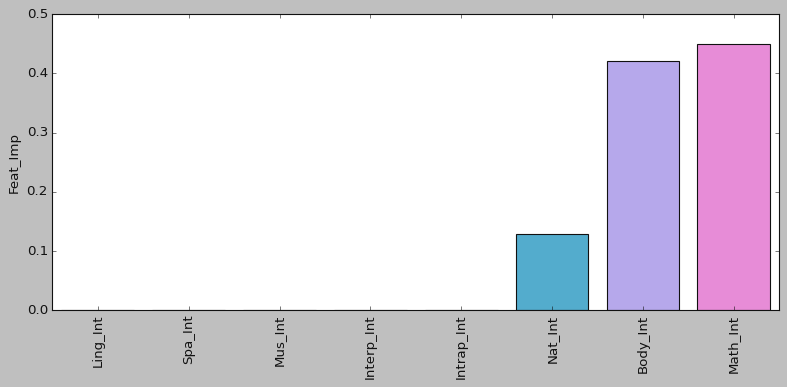

In [95]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate
model = DecisionTreeClassifier(criterion="gini",
                               max_depth=5,
                               max_features=None,
                               min_samples_leaf=7,
                               min_samples_split=2,
                               splitter="best")
model.fit(X_train, y_train)
Feat_Imp = pd.DataFrame(index=X.columns,
                        data = model.feature_importances_, 
                        columns = ["Feat_Imp"]).sort_values("Feat_Imp")
plt.figure(figsize=(10,5))
sns.barplot(x = Feat_Imp.index, y = 'Feat_Imp', data = Feat_Imp)
plt.xticks(rotation = 90)
plt.tight_layout();

### DT Visualize Tree

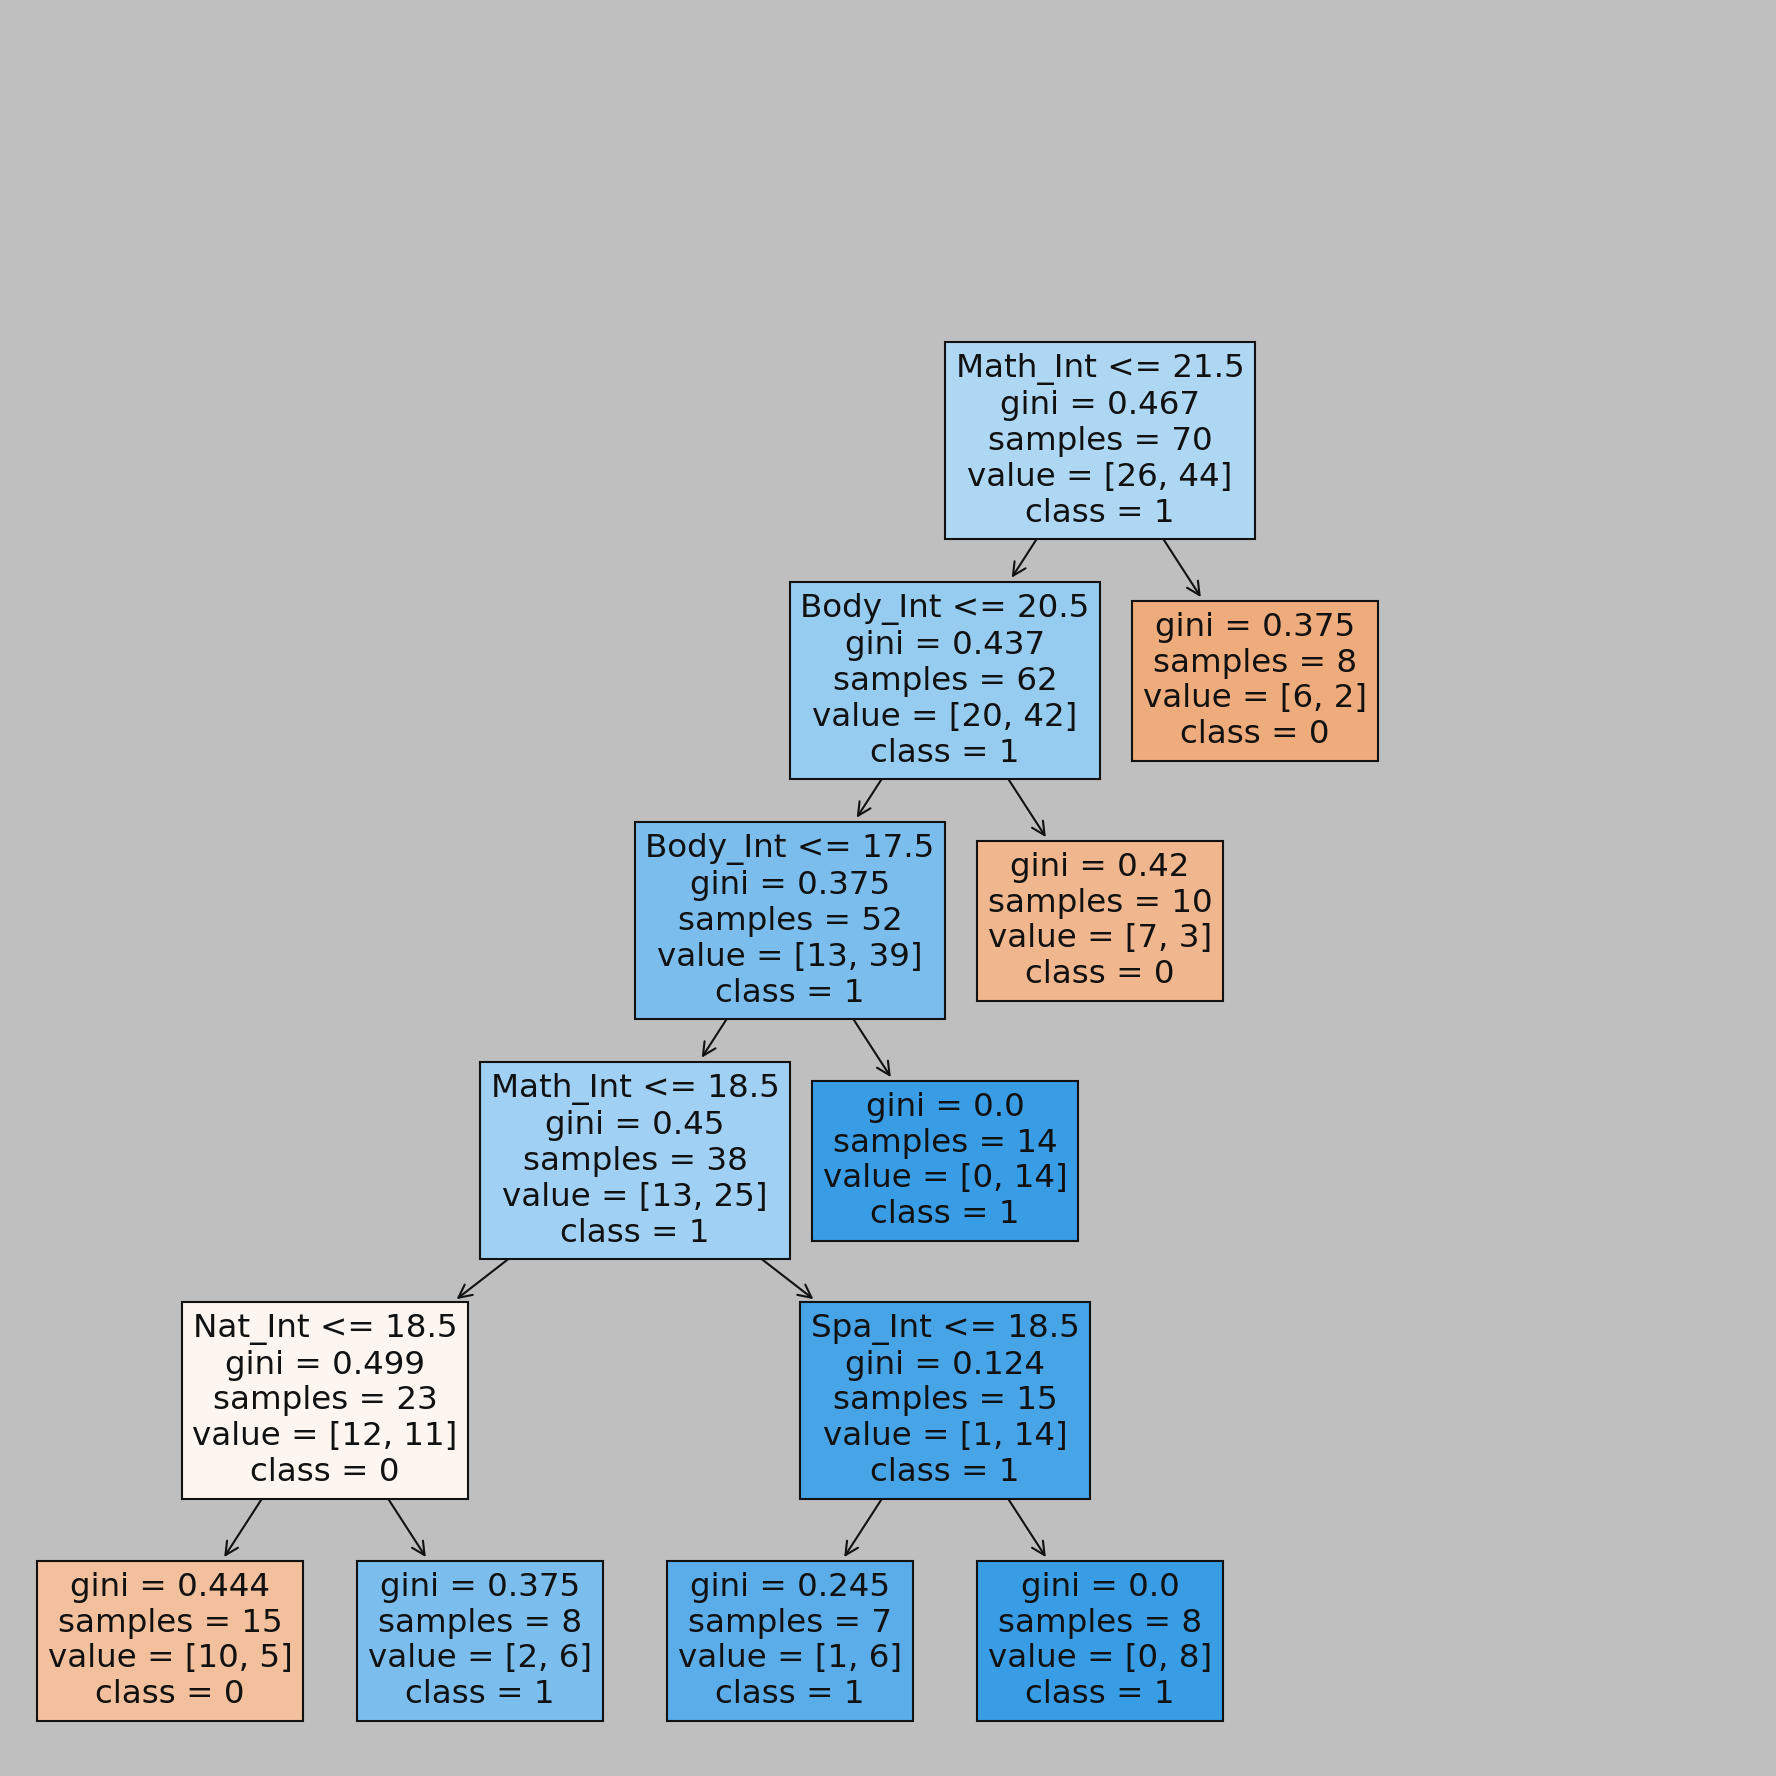

In [100]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate
from sklearn.tree import plot_tree

model = DecisionTreeClassifier(criterion="gini",
                               max_depth=5,
                               max_features=None,
                               min_samples_leaf=7,
                               min_samples_split=2,
                               splitter="best")
model.fit(X_train, y_train)

plt.figure(figsize=(12,12),dpi=150)
plot_tree(model,
          filled=True,
          feature_names=X.columns,
          class_names = ["0", "1"])
plt.tight_layout();

## RF

### RF & Best n_estimators

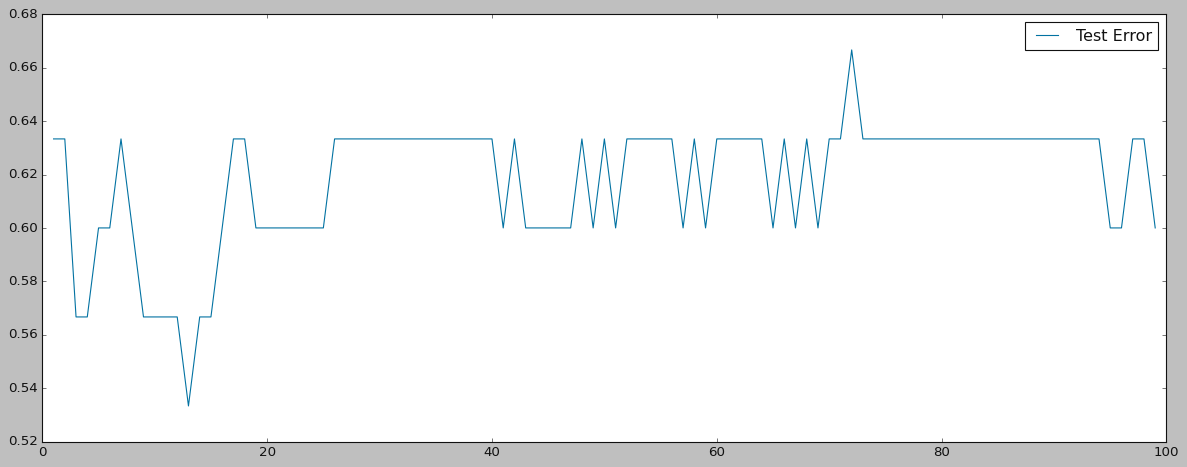

In [102]:
# rf_model & Not Scaled & Best n_estimators
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

test_error = []

for n in range(1,100):
    model = RandomForestClassifier(n_estimators=n, max_features='auto', random_state=42)
    model.fit(X_train, y_train)
    test_preds = model.predict(X_test)
    test_error.append(1-accuracy_score(test_preds, y_test))
    
plt.figure(figsize=(15,6))
plt.plot(range(1,100), test_error, label='Test Error')
plt.legend()
plt.tight_layout();
# Best "n_estimators"=12

### RF & Optimal Threshold

In [103]:
# rf_model & Not Scaled & Optimal Threshold
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import accuracy_score

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

y_test_prd = rf_model.predict(X_test)
y_test_prd_prb = pd.Series(rf_model.predict_proba(X_test)[:,1])

y_train_prd_prb = rf_model.predict_proba(X_train)
roc_auc_score(y_train, y_train_prd_prb[:,1])
fp_rate, tp_rate, thresholds = roc_curve(y_train, y_train_prd_prb[:,1])
optimal_idx = np.argmax(tp_rate - fp_rate)
optimal_threshold_rac = thresholds[optimal_idx]
y_test_prd = y_test_prd_prb.apply(lambda x : 1 if x >= optimal_threshold_rac else 0)

rf_scores = {"rf": {"acc" : round(accuracy_score(y_test, y_test_prd), 2),
                    "prc" : round(precision_score(y_test, y_test_prd, pos_label=1), 2),
                    "rec" : round(recall_score(y_test, y_test_prd, pos_label=1), 2),
                    "f1s" : round(f1_score(y_test, y_test_prd, pos_label=1), 2),
                    "roc" : round(roc_auc_score(y_test, y_test_prd), 2)}}

rf_scr = pd.DataFrame(rf_scores, index=["acc","prc","rec","f1s", "roc"])
rf_scr

,rf
acc,0.60
prc,0.58
rec,0.50
f1s,0.54
roc,0.59


In [104]:
# rf_model & MinMax Scaled & Optimal Threshold
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import accuracy_score

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_mms, y_train)

y_test_prd = rf_model.predict(X_test_mms)
y_test_prd_prb = pd.Series(rf_model.predict_proba(X_test_mms)[:,1])

y_train_prd_prb = rf_model.predict_proba(X_train_mms)
roc_auc_score(y_train, y_train_prd_prb[:,1])
fp_rate, tp_rate, thresholds = roc_curve(y_train, y_train_prd_prb[:,1])
optimal_idx = np.argmax(tp_rate - fp_rate)
optimal_threshold_rac = thresholds[optimal_idx]
y_test_prd = y_test_prd_prb.apply(lambda x : 1 if x >= optimal_threshold_rac else 0)

rf_scores = {"rf_mms": {"acc" : round(accuracy_score(y_test, y_test_prd), 2),
                        "prc" : round(precision_score(y_test, y_test_prd, pos_label=1), 2),
                        "rec" : round(recall_score(y_test, y_test_prd, pos_label=1), 2),
                        "f1s" : round(f1_score(y_test, y_test_prd, pos_label=1), 2),
                        "roc" : round(roc_auc_score(y_test, y_test_prd), 2)}}

rf_mms_scr = pd.DataFrame(rf_scores, index=["acc","prc","rec","f1s", "roc"])
rf_mms_scr

,rf_mms
acc,0.60
prc,0.57
rec,0.57
f1s,0.57
roc,0.60


In [105]:
# rf_model & Standard Scaled & Optimal Threshold
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import accuracy_score

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_ss, y_train)

y_test_prd = rf_model.predict(X_test_ss)
y_test_prd_prb = pd.Series(rf_model.predict_proba(X_test_ss)[:,1])

y_train_prd_prb = rf_model.predict_proba(X_train_ss)
roc_auc_score(y_train, y_train_prd_prb[:,1])
fp_rate, tp_rate, thresholds = roc_curve(y_train, y_train_prd_prb[:,1])
optimal_idx = np.argmax(tp_rate - fp_rate)
optimal_threshold_rac = thresholds[optimal_idx]
y_test_prd = y_test_prd_prb.apply(lambda x : 1 if x >= optimal_threshold_rac else 0)

rf_scores = {"rf_ss": {"acc" : round(accuracy_score(y_test, y_test_prd), 2),
                       "prc" : round(precision_score(y_test, y_test_prd, pos_label=1), 2),
                       "rec" : round(recall_score(y_test, y_test_prd, pos_label=1), 2),
                       "f1s" : round(f1_score(y_test, y_test_prd, pos_label=1), 2),
                       "roc" : round(roc_auc_score(y_test, y_test_prd), 2)}}

rf_ss_scr = pd.DataFrame(rf_scores, index=["acc","prc","rec","f1s", "roc"])
rf_ss_scr

,rf_ss
acc,0.57
prc,0.55
rec,0.43
f1s,0.48
roc,0.56


In [106]:
rf_def_scrs = pd.concat([rf_scr, rf_mms_scr, rf_ss_scr], axis=1)
rf_def_scrs

,rf,rf_mms,rf_ss
acc,0.60,0.60,0.57
prc,0.58,0.57,0.55
rec,0.50,0.57,0.43
f1s,0.54,0.57,0.48
roc,0.59,0.60,0.56


### RF & GridSearchCV & Optimal Threshold

In [107]:
# rf_model & Not Scaled & GridSearchCV & Optimal Threshold
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import accuracy_score

rf_model = RandomForestClassifier(random_state=42)
param_grid = {'n_estimators':[5, 10, 15, 20, 25, 30],
              'max_features':[2, 3, 4],
              'max_depth':[3, 5, 7, 9],
              'min_samples_split':[2, 5, 8]}
rf_grd = GridSearchCV(rf_model, param_grid, scoring = "accuracy", n_jobs = -1, verbose = 2)

rf_grd.fit(X_train, y_train)
y_test_prd = rf_grd.predict(X_test)
y_test_prd_prb = pd.Series(rf_grd.predict_proba(X_test)[:,1])

y_train_prd_prb = rf_grd.predict_proba(X_train)
roc_auc_score(y_train, y_train_prd_prb[:,1])
fp_rate, tp_rate, thresholds = roc_curve(y_train, y_train_prd_prb[:,1])
optimal_idx = np.argmax(tp_rate - fp_rate)
optimal_threshold_rac = thresholds[optimal_idx]
y_test_prd = y_test_prd_prb.apply(lambda x : 1 if x >= optimal_threshold_rac else 0)

rf_scores = {"rf_grd": {"acc" : round(accuracy_score(y_test, y_test_prd), 2),
                        "prc" : round(precision_score(y_test, y_test_prd, pos_label=1), 2),
                        "rec" : round(recall_score(y_test, y_test_prd, pos_label=1), 2),
                        "f1s" : round(f1_score(y_test, y_test_prd, pos_label=1), 2),
                        "roc" : round(roc_auc_score(y_test, y_test_prd), 2)}}

rf_scr = pd.DataFrame(rf_scores, index=["acc","prc","rec","f1s", "roc"])
print(rf_grd.best_params_)
rf_scr

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
{'max_depth': 3, 'max_features': 4, 'min_samples_split': 5, 'n_estimators': 25}


,rf_grd
acc,0.43
prc,0.42
rec,0.57
f1s,0.48
roc,0.44


In [108]:
# rf_model & MinMax Scaled & GridSearchCV & Optimal Threshold
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import accuracy_score

rf_model = RandomForestClassifier(random_state=42)
param_grid = {'n_estimators':[5, 10, 15, 20, 25, 30],
              'max_features':[2, 3, 4],
              'max_depth':[3, 5, 7, 9],
              'min_samples_split':[2, 5, 8]}
rf_grd = GridSearchCV(rf_model, param_grid, scoring = "accuracy", n_jobs = -1, verbose = 2)

rf_grd.fit(X_train_mms, y_train)
y_test_prd = rf_grd.predict(X_test_mms)
y_test_prd_prb = pd.Series(rf_grd.predict_proba(X_test_mms)[:,1])

y_train_prd_prb = rf_grd.predict_proba(X_train_mms)
roc_auc_score(y_train, y_train_prd_prb[:,1])
fp_rate, tp_rate, thresholds = roc_curve(y_train, y_train_prd_prb[:,1])
optimal_idx = np.argmax(tp_rate - fp_rate)
optimal_threshold_rac = thresholds[optimal_idx]
y_test_prd = y_test_prd_prb.apply(lambda x : 1 if x >= optimal_threshold_rac else 0)

rf_scores = {"rf_grd_mms": {"acc" : round(accuracy_score(y_test, y_test_prd), 2),
                            "prc" : round(precision_score(y_test, y_test_prd, pos_label=1), 2),
                            "rec" : round(recall_score(y_test, y_test_prd, pos_label=1), 2),
                            "f1s" : round(f1_score(y_test, y_test_prd, pos_label=1), 2),
                            "roc" : round(roc_auc_score(y_test, y_test_prd), 2)}}

rf_mms_scr = pd.DataFrame(rf_scores, index=["acc","prc","rec","f1s", "roc"])
print(rf_grd.best_params_)
rf_mms_scr

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
{'max_depth': 5, 'max_features': 2, 'min_samples_split': 5, 'n_estimators': 20}


,rf_grd_mms
acc,0.47
prc,0.45
rec,0.71
f1s,0.56
roc,0.48


In [109]:
# rf_model & Standard Scaled & Optimal Threshold
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import accuracy_score

rf_model = RandomForestClassifier(random_state=42)
param_grid = {'n_estimators':[5, 10, 15, 20, 25, 30],
              'max_features':[2, 3, 4],
              'max_depth':[3, 5, 7, 9],
              'min_samples_split':[2, 5, 8]}
rf_grd = GridSearchCV(rf_model, param_grid, scoring = "accuracy", n_jobs = -1, verbose = 2)

rf_grd.fit(X_train_ss, y_train)
y_test_prd = rf_grd.predict(X_test_ss)
y_test_prd_prb = pd.Series(rf_grd.predict_proba(X_test_ss)[:,1])

y_train_prd_prb = rf_grd.predict_proba(X_train_ss)
roc_auc_score(y_train, y_train_prd_prb[:,1])
fp_rate, tp_rate, thresholds = roc_curve(y_train, y_train_prd_prb[:,1])
optimal_idx = np.argmax(tp_rate - fp_rate)
optimal_threshold_rac = thresholds[optimal_idx]
y_test_prd = y_test_prd_prb.apply(lambda x : 1 if x >= optimal_threshold_rac else 0)

rf_scores = {"rf_grd_ss": {"acc" : round(accuracy_score(y_test, y_test_prd), 2),
                           "prc" : round(precision_score(y_test, y_test_prd, pos_label=1), 2),
                           "rec" : round(recall_score(y_test, y_test_prd, pos_label=1), 2),
                           "f1s" : round(f1_score(y_test, y_test_prd, pos_label=1), 2),
                           "roc" : round(roc_auc_score(y_test, y_test_prd), 2)}}

rf_ss_scr = pd.DataFrame(rf_scores, index=["acc","prc","rec","f1s", "roc"])
print(rf_grd.best_params_)
rf_ss_scr

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
{'max_depth': 3, 'max_features': 2, 'min_samples_split': 5, 'n_estimators': 15}


,rf_grd_ss
acc,0.43
prc,0.41
rec,0.50
f1s,0.45
roc,0.44


In [110]:
rf_grd_scrs = pd.concat([rf_scr, rf_mms_scr, rf_ss_scr], axis=1)
rf_grd_scrs

,rf_grd,rf_grd_mms,rf_grd_ss
acc,0.43,0.47,0.43
prc,0.42,0.45,0.41
rec,0.57,0.71,0.50
f1s,0.48,0.56,0.45
roc,0.44,0.48,0.44


In [111]:
rf_mid_scrs = pd.concat([rf_def_scrs, rf_grd_scrs], axis=1)
rf_mid_scrs.columns = ["rf","rf_grd","rf_mms","rf_grd_mms","rf_ss","rf_grd_ss"]
rf_mid_scrs

,rf,rf_grd,rf_mms,rf_grd_mms,rf_ss,rf_grd_ss
acc,0.60,0.60,0.57,0.43,0.47,0.43
prc,0.58,0.57,0.55,0.42,0.45,0.41
rec,0.50,0.57,0.43,0.57,0.71,0.50
f1s,0.54,0.57,0.48,0.48,0.56,0.45
roc,0.59,0.60,0.56,0.44,0.48,0.44


### RF & CV

In [112]:
# rf_model & Not Scaled & CV
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import cross_validate

rf_model = RandomForestClassifier(random_state=42)
scores = cross_validate(rf_model,
                        X_train,
                        y_train,
                        scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc'],
                        cv = 10)
rf_cv_scr = pd.DataFrame(scores, index = range(1, 11))
rf_cv_scr = rf_cv_scr.mean()[2:]
rf_cv_scr

test_accuracy    0.61
test_precision   0.64
test_recall      0.84
test_f1          0.72
test_roc_auc     0.62
dtype: float64

In [113]:
# rf_model & MinMax Scaled & CV
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import cross_validate

rf_model = RandomForestClassifier(random_state=42)
scores = cross_validate(rf_model,
                        X_train_mms,
                        y_train,
                        scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc'],
                        cv = 10)
rf_mms_cv_scr = pd.DataFrame(scores, index = range(1, 11))
rf_mms_cv_scr = rf_mms_cv_scr.mean()[2:]
rf_mms_cv_scr

test_accuracy    0.60
test_precision   0.64
test_recall      0.82
test_f1          0.71
test_roc_auc     0.64
dtype: float64

In [114]:
# dt_model & Standard Scaled & CV
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import cross_validate

rf_model = RandomForestClassifier(random_state=42)
scores = cross_validate(rf_model,
                        X_train_ss,
                        y_train,
                        scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc'],
                        cv = 10)
rf_ss_cv_scr = pd.DataFrame(scores, index = range(1, 11))
rf_ss_cv_scr = rf_ss_cv_scr.mean()[2:]
rf_ss_cv_scr

test_accuracy    0.59
test_precision   0.63
test_recall      0.79
test_f1          0.69
test_roc_auc     0.64
dtype: float64

In [115]:
rf_cv_scrs = pd.concat([rf_cv_scr, rf_mms_cv_scr, rf_ss_cv_scr], axis=1)
rf_cv_scrs.rename(columns={0:"rf_cv",
                           1:"rf_cv_mms",
                           2:"rf_cv_ss"},
                  index={"test_accuracy":"acc",
                         "test_precision":"prc",
                         "test_recall":"rec",
                         "test_f1":"f1s",
                         "test_roc_auc":"roc"},
                  inplace=True)
rf_cv_scrs

,rf_cv,rf_cv_mms,rf_cv_ss
acc,0.61,0.60,0.59
prc,0.64,0.64,0.63
rec,0.84,0.82,0.79
f1s,0.72,0.71,0.69
roc,0.62,0.64,0.64


In [116]:
rf_cum_scrs = pd.concat([rf_def_scrs, rf_grd_scrs, rf_cv_scrs], axis=1)
rf_cum_scrs.columns = ["rf","rf_grd","rf_cv","rf_mms","rf_grd_mms","rf_cv_mms","rf_ss","rf_grd_ss","rf_cv_ss"]
rf_cum_scrs

,rf,rf_grd,rf_cv,rf_mms,rf_grd_mms,rf_cv_mms,rf_ss,rf_grd_ss,rf_cv_ss
acc,0.60,0.60,0.57,0.43,0.47,0.43,0.61,0.60,0.59
prc,0.58,0.57,0.55,0.42,0.45,0.41,0.64,0.64,0.63
rec,0.50,0.57,0.43,0.57,0.71,0.50,0.84,0.82,0.79
f1s,0.54,0.57,0.48,0.48,0.56,0.45,0.72,0.71,0.69
roc,0.59,0.60,0.56,0.44,0.48,0.44,0.62,0.64,0.64


### RF Feature Importances

In [ ]:
{'max_depth': 3, 'max_features': 4, 'min_samples_split': 5, 'n_estimators': 25}

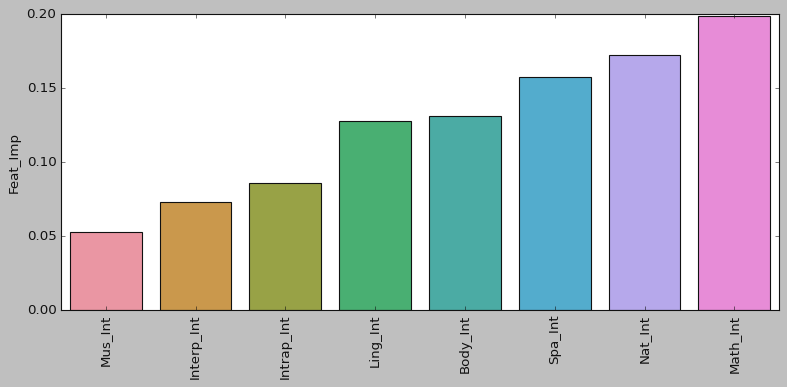

In [117]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate
model = RandomForestClassifier(max_depth=3,
                               max_features=4,
                               min_samples_split=5,
                               n_estimators=25,
                               random_state=42)
model.fit(X_train, y_train)
Feat_Imp = pd.DataFrame(index=X.columns,
                        data = model.feature_importances_, 
                        columns = ["Feat_Imp"]).sort_values("Feat_Imp")
plt.figure(figsize=(10,5))
sns.barplot(x = Feat_Imp.index, y = 'Feat_Imp', data = Feat_Imp)
plt.xticks(rotation = 90)
plt.tight_layout();

### RF Visualize Tree

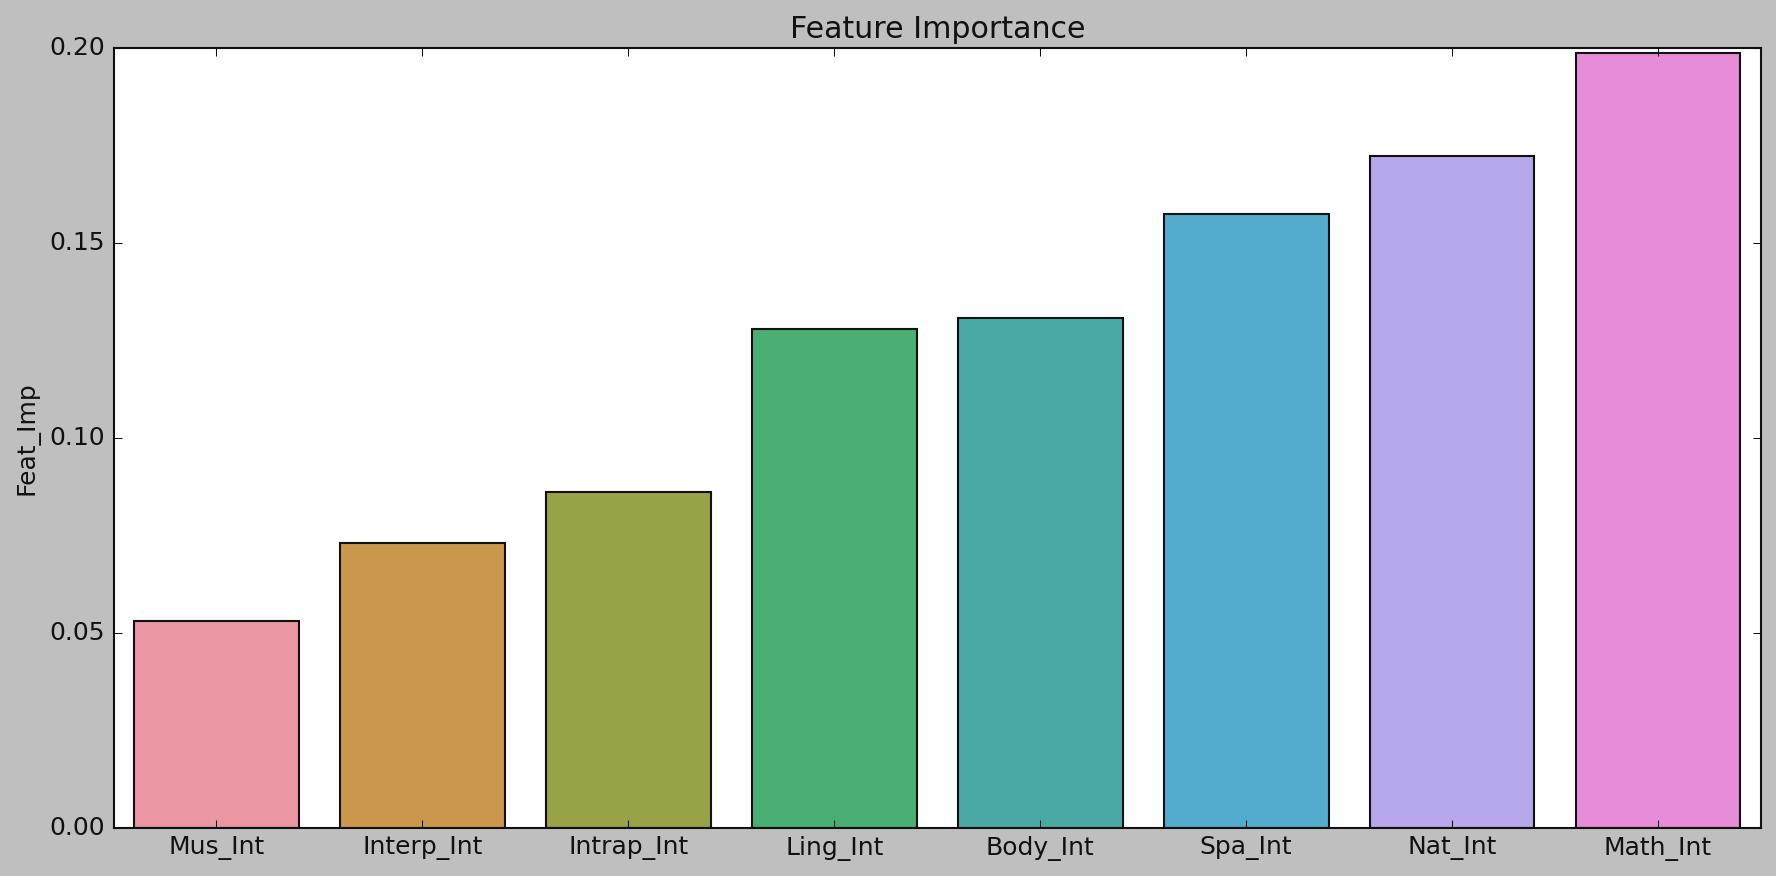

In [120]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate
from sklearn.tree import plot_tree

model = RandomForestClassifier(max_depth=3,
                               max_features=4,
                               min_samples_split=5,
                               n_estimators=25,
                               random_state=42)
model.fit(X_train, y_train)

plt.figure(figsize=(12,6),dpi=150)
sns.barplot(x=Feat_Imp.index, y=Feat_Imp["Feat_Imp"])
plt.title("Feature Importance")
plt.tight_layout();

## AdaBoosting

### RF & Best n_estimators

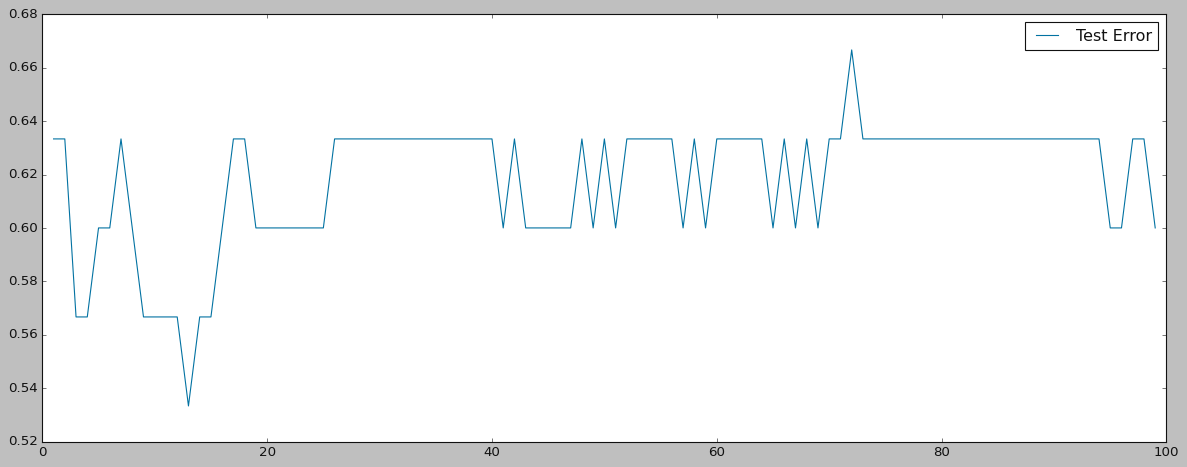

In [ ]:
# rf_model & Not Scaled & Best n_estimators
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

test_error = []

for n in range(1,100):
    model = RandomForestClassifier(n_estimators=n, max_features='auto', random_state=42)
    model.fit(X_train, y_train)
    test_preds = model.predict(X_test)
    test_error.append(1-accuracy_score(test_preds, y_test))
    
plt.figure(figsize=(15,6))
plt.plot(range(1,100), test_error, label='Test Error')
plt.legend()
plt.tight_layout();
# Best "n_estimators"=12

### RF & Optimal Threshold

In [ ]:
# rf_model & Not Scaled & Optimal Threshold
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import accuracy_score

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

y_test_prd = rf_model.predict(X_test)
y_test_prd_prb = pd.Series(rf_model.predict_proba(X_test)[:,1])

y_train_prd_prb = rf_model.predict_proba(X_train)
roc_auc_score(y_train, y_train_prd_prb[:,1])
fp_rate, tp_rate, thresholds = roc_curve(y_train, y_train_prd_prb[:,1])
optimal_idx = np.argmax(tp_rate - fp_rate)
optimal_threshold_rac = thresholds[optimal_idx]
y_test_prd = y_test_prd_prb.apply(lambda x : 1 if x >= optimal_threshold_rac else 0)

rf_scores = {"rf": {"acc" : round(accuracy_score(y_test, y_test_prd), 2),
                    "prc" : round(precision_score(y_test, y_test_prd, pos_label=1), 2),
                    "rec" : round(recall_score(y_test, y_test_prd, pos_label=1), 2),
                    "f1s" : round(f1_score(y_test, y_test_prd, pos_label=1), 2),
                    "roc" : round(roc_auc_score(y_test, y_test_prd), 2)}}

rf_scr = pd.DataFrame(rf_scores, index=["acc","prc","rec","f1s", "roc"])
rf_scr

,rf
acc,0.60
prc,0.58
rec,0.50
f1s,0.54
roc,0.59


In [ ]:
# rf_model & MinMax Scaled & Optimal Threshold
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import accuracy_score

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_mms, y_train)

y_test_prd = rf_model.predict(X_test_mms)
y_test_prd_prb = pd.Series(rf_model.predict_proba(X_test_mms)[:,1])

y_train_prd_prb = rf_model.predict_proba(X_train_mms)
roc_auc_score(y_train, y_train_prd_prb[:,1])
fp_rate, tp_rate, thresholds = roc_curve(y_train, y_train_prd_prb[:,1])
optimal_idx = np.argmax(tp_rate - fp_rate)
optimal_threshold_rac = thresholds[optimal_idx]
y_test_prd = y_test_prd_prb.apply(lambda x : 1 if x >= optimal_threshold_rac else 0)

rf_scores = {"rf_mms": {"acc" : round(accuracy_score(y_test, y_test_prd), 2),
                        "prc" : round(precision_score(y_test, y_test_prd, pos_label=1), 2),
                        "rec" : round(recall_score(y_test, y_test_prd, pos_label=1), 2),
                        "f1s" : round(f1_score(y_test, y_test_prd, pos_label=1), 2),
                        "roc" : round(roc_auc_score(y_test, y_test_prd), 2)}}

rf_mms_scr = pd.DataFrame(rf_scores, index=["acc","prc","rec","f1s", "roc"])
rf_mms_scr

,rf_mms
acc,0.60
prc,0.57
rec,0.57
f1s,0.57
roc,0.60


In [ ]:
# rf_model & Standard Scaled & Optimal Threshold
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import accuracy_score

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_ss, y_train)

y_test_prd = rf_model.predict(X_test_ss)
y_test_prd_prb = pd.Series(rf_model.predict_proba(X_test_ss)[:,1])

y_train_prd_prb = rf_model.predict_proba(X_train_ss)
roc_auc_score(y_train, y_train_prd_prb[:,1])
fp_rate, tp_rate, thresholds = roc_curve(y_train, y_train_prd_prb[:,1])
optimal_idx = np.argmax(tp_rate - fp_rate)
optimal_threshold_rac = thresholds[optimal_idx]
y_test_prd = y_test_prd_prb.apply(lambda x : 1 if x >= optimal_threshold_rac else 0)

rf_scores = {"rf_ss": {"acc" : round(accuracy_score(y_test, y_test_prd), 2),
                       "prc" : round(precision_score(y_test, y_test_prd, pos_label=1), 2),
                       "rec" : round(recall_score(y_test, y_test_prd, pos_label=1), 2),
                       "f1s" : round(f1_score(y_test, y_test_prd, pos_label=1), 2),
                       "roc" : round(roc_auc_score(y_test, y_test_prd), 2)}}

rf_ss_scr = pd.DataFrame(rf_scores, index=["acc","prc","rec","f1s", "roc"])
rf_ss_scr

,rf_ss
acc,0.57
prc,0.55
rec,0.43
f1s,0.48
roc,0.56


In [ ]:
rf_def_scrs = pd.concat([rf_scr, rf_mms_scr, rf_ss_scr], axis=1)
rf_def_scrs

,rf,rf_mms,rf_ss
acc,0.60,0.60,0.57
prc,0.58,0.57,0.55
rec,0.50,0.57,0.43
f1s,0.54,0.57,0.48
roc,0.59,0.60,0.56


### RF & GridSearchCV & Optimal Threshold

In [ ]:
# rf_model & Not Scaled & GridSearchCV & Optimal Threshold
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import accuracy_score

rf_model = RandomForestClassifier(random_state=42)
param_grid = {'n_estimators':[5, 10, 15, 20, 25, 30],
              'max_features':[2, 3, 4],
              'max_depth':[3, 5, 7, 9],
              'min_samples_split':[2, 5, 8]}
rf_grd = GridSearchCV(rf_model, param_grid, scoring = "accuracy", n_jobs = -1, verbose = 2)

rf_grd.fit(X_train, y_train)
y_test_prd = rf_grd.predict(X_test)
y_test_prd_prb = pd.Series(rf_grd.predict_proba(X_test)[:,1])

y_train_prd_prb = rf_grd.predict_proba(X_train)
roc_auc_score(y_train, y_train_prd_prb[:,1])
fp_rate, tp_rate, thresholds = roc_curve(y_train, y_train_prd_prb[:,1])
optimal_idx = np.argmax(tp_rate - fp_rate)
optimal_threshold_rac = thresholds[optimal_idx]
y_test_prd = y_test_prd_prb.apply(lambda x : 1 if x >= optimal_threshold_rac else 0)

rf_scores = {"rf_grd": {"acc" : round(accuracy_score(y_test, y_test_prd), 2),
                        "prc" : round(precision_score(y_test, y_test_prd, pos_label=1), 2),
                        "rec" : round(recall_score(y_test, y_test_prd, pos_label=1), 2),
                        "f1s" : round(f1_score(y_test, y_test_prd, pos_label=1), 2),
                        "roc" : round(roc_auc_score(y_test, y_test_prd), 2)}}

rf_scr = pd.DataFrame(rf_scores, index=["acc","prc","rec","f1s", "roc"])
print(rf_grd.best_params_)
rf_scr

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
{'max_depth': 3, 'max_features': 4, 'min_samples_split': 5, 'n_estimators': 25}


,rf_grd
acc,0.43
prc,0.42
rec,0.57
f1s,0.48
roc,0.44


In [ ]:
# rf_model & MinMax Scaled & GridSearchCV & Optimal Threshold
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import accuracy_score

rf_model = RandomForestClassifier(random_state=42)
param_grid = {'n_estimators':[5, 10, 15, 20, 25, 30],
              'max_features':[2, 3, 4],
              'max_depth':[3, 5, 7, 9],
              'min_samples_split':[2, 5, 8]}
rf_grd = GridSearchCV(rf_model, param_grid, scoring = "accuracy", n_jobs = -1, verbose = 2)

rf_grd.fit(X_train_mms, y_train)
y_test_prd = rf_grd.predict(X_test_mms)
y_test_prd_prb = pd.Series(rf_grd.predict_proba(X_test_mms)[:,1])

y_train_prd_prb = rf_grd.predict_proba(X_train_mms)
roc_auc_score(y_train, y_train_prd_prb[:,1])
fp_rate, tp_rate, thresholds = roc_curve(y_train, y_train_prd_prb[:,1])
optimal_idx = np.argmax(tp_rate - fp_rate)
optimal_threshold_rac = thresholds[optimal_idx]
y_test_prd = y_test_prd_prb.apply(lambda x : 1 if x >= optimal_threshold_rac else 0)

rf_scores = {"rf_grd_mms": {"acc" : round(accuracy_score(y_test, y_test_prd), 2),
                            "prc" : round(precision_score(y_test, y_test_prd, pos_label=1), 2),
                            "rec" : round(recall_score(y_test, y_test_prd, pos_label=1), 2),
                            "f1s" : round(f1_score(y_test, y_test_prd, pos_label=1), 2),
                            "roc" : round(roc_auc_score(y_test, y_test_prd), 2)}}

rf_mms_scr = pd.DataFrame(rf_scores, index=["acc","prc","rec","f1s", "roc"])
print(rf_grd.best_params_)
rf_mms_scr

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
{'max_depth': 5, 'max_features': 2, 'min_samples_split': 5, 'n_estimators': 20}


,rf_grd_mms
acc,0.47
prc,0.45
rec,0.71
f1s,0.56
roc,0.48


In [ ]:
# rf_model & Standard Scaled & Optimal Threshold
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import accuracy_score

rf_model = RandomForestClassifier(random_state=42)
param_grid = {'n_estimators':[5, 10, 15, 20, 25, 30],
              'max_features':[2, 3, 4],
              'max_depth':[3, 5, 7, 9],
              'min_samples_split':[2, 5, 8]}
rf_grd = GridSearchCV(rf_model, param_grid, scoring = "accuracy", n_jobs = -1, verbose = 2)

rf_grd.fit(X_train_ss, y_train)
y_test_prd = rf_grd.predict(X_test_ss)
y_test_prd_prb = pd.Series(rf_grd.predict_proba(X_test_ss)[:,1])

y_train_prd_prb = rf_grd.predict_proba(X_train_ss)
roc_auc_score(y_train, y_train_prd_prb[:,1])
fp_rate, tp_rate, thresholds = roc_curve(y_train, y_train_prd_prb[:,1])
optimal_idx = np.argmax(tp_rate - fp_rate)
optimal_threshold_rac = thresholds[optimal_idx]
y_test_prd = y_test_prd_prb.apply(lambda x : 1 if x >= optimal_threshold_rac else 0)

rf_scores = {"rf_grd_ss": {"acc" : round(accuracy_score(y_test, y_test_prd), 2),
                           "prc" : round(precision_score(y_test, y_test_prd, pos_label=1), 2),
                           "rec" : round(recall_score(y_test, y_test_prd, pos_label=1), 2),
                           "f1s" : round(f1_score(y_test, y_test_prd, pos_label=1), 2),
                           "roc" : round(roc_auc_score(y_test, y_test_prd), 2)}}

rf_ss_scr = pd.DataFrame(rf_scores, index=["acc","prc","rec","f1s", "roc"])
print(rf_grd.best_params_)
rf_ss_scr

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
{'max_depth': 3, 'max_features': 2, 'min_samples_split': 5, 'n_estimators': 15}


,rf_grd_ss
acc,0.43
prc,0.41
rec,0.50
f1s,0.45
roc,0.44


In [ ]:
rf_grd_scrs = pd.concat([rf_scr, rf_mms_scr, rf_ss_scr], axis=1)
rf_grd_scrs

,rf_grd,rf_grd_mms,rf_grd_ss
acc,0.43,0.47,0.43
prc,0.42,0.45,0.41
rec,0.57,0.71,0.50
f1s,0.48,0.56,0.45
roc,0.44,0.48,0.44


In [ ]:
rf_mid_scrs = pd.concat([rf_def_scrs, rf_grd_scrs], axis=1)
rf_mid_scrs.columns = ["rf","rf_grd","rf_mms","rf_grd_mms","rf_ss","rf_grd_ss"]
rf_mid_scrs

,rf,rf_grd,rf_mms,rf_grd_mms,rf_ss,rf_grd_ss
acc,0.60,0.60,0.57,0.43,0.47,0.43
prc,0.58,0.57,0.55,0.42,0.45,0.41
rec,0.50,0.57,0.43,0.57,0.71,0.50
f1s,0.54,0.57,0.48,0.48,0.56,0.45
roc,0.59,0.60,0.56,0.44,0.48,0.44


### RF & CV

In [ ]:
# rf_model & Not Scaled & CV
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import cross_validate

rf_model = RandomForestClassifier(random_state=42)
scores = cross_validate(rf_model,
                        X_train,
                        y_train,
                        scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc'],
                        cv = 10)
rf_cv_scr = pd.DataFrame(scores, index = range(1, 11))
rf_cv_scr = rf_cv_scr.mean()[2:]
rf_cv_scr

test_accuracy    0.61
test_precision   0.64
test_recall      0.84
test_f1          0.72
test_roc_auc     0.62
dtype: float64

In [ ]:
# rf_model & MinMax Scaled & CV
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import cross_validate

rf_model = RandomForestClassifier(random_state=42)
scores = cross_validate(rf_model,
                        X_train_mms,
                        y_train,
                        scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc'],
                        cv = 10)
rf_mms_cv_scr = pd.DataFrame(scores, index = range(1, 11))
rf_mms_cv_scr = rf_mms_cv_scr.mean()[2:]
rf_mms_cv_scr

test_accuracy    0.60
test_precision   0.64
test_recall      0.82
test_f1          0.71
test_roc_auc     0.64
dtype: float64

In [ ]:
# dt_model & Standard Scaled & CV
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import cross_validate

rf_model = RandomForestClassifier(random_state=42)
scores = cross_validate(rf_model,
                        X_train_ss,
                        y_train,
                        scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc'],
                        cv = 10)
rf_ss_cv_scr = pd.DataFrame(scores, index = range(1, 11))
rf_ss_cv_scr = rf_ss_cv_scr.mean()[2:]
rf_ss_cv_scr

test_accuracy    0.59
test_precision   0.63
test_recall      0.79
test_f1          0.69
test_roc_auc     0.64
dtype: float64

In [ ]:
rf_cv_scrs = pd.concat([rf_cv_scr, rf_mms_cv_scr, rf_ss_cv_scr], axis=1)
rf_cv_scrs.rename(columns={0:"rf_cv",
                           1:"rf_cv_mms",
                           2:"rf_cv_ss"},
                  index={"test_accuracy":"acc",
                         "test_precision":"prc",
                         "test_recall":"rec",
                         "test_f1":"f1s",
                         "test_roc_auc":"roc"},
                  inplace=True)
rf_cv_scrs

,rf_cv,rf_cv_mms,rf_cv_ss
acc,0.61,0.60,0.59
prc,0.64,0.64,0.63
rec,0.84,0.82,0.79
f1s,0.72,0.71,0.69
roc,0.62,0.64,0.64


In [ ]:
rf_cum_scrs = pd.concat([rf_def_scrs, rf_grd_scrs, rf_cv_scrs], axis=1)
rf_cum_scrs.columns = ["rf","rf_grd","rf_cv","rf_mms","rf_grd_mms","rf_cv_mms","rf_ss","rf_grd_ss","rf_cv_ss"]
rf_cum_scrs

,rf,rf_grd,rf_cv,rf_mms,rf_grd_mms,rf_cv_mms,rf_ss,rf_grd_ss,rf_cv_ss
acc,0.60,0.60,0.57,0.43,0.47,0.43,0.61,0.60,0.59
prc,0.58,0.57,0.55,0.42,0.45,0.41,0.64,0.64,0.63
rec,0.50,0.57,0.43,0.57,0.71,0.50,0.84,0.82,0.79
f1s,0.54,0.57,0.48,0.48,0.56,0.45,0.72,0.71,0.69
roc,0.59,0.60,0.56,0.44,0.48,0.44,0.62,0.64,0.64


### RF Feature Importances

In [ ]:
{'max_depth': 3, 'max_features': 4, 'min_samples_split': 5, 'n_estimators': 25}

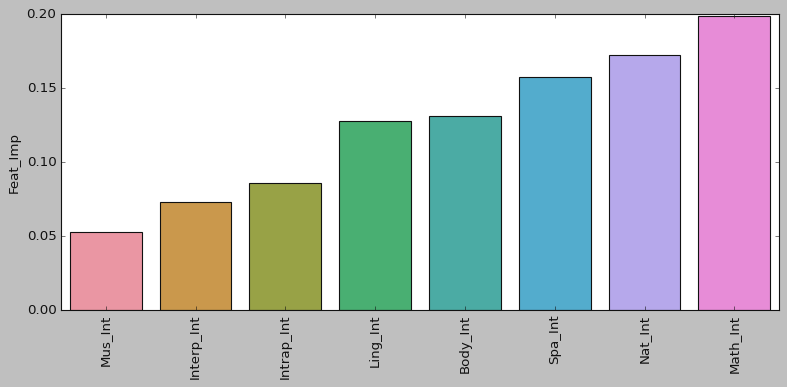

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate
model = RandomForestClassifier(max_depth=3,
                               max_features=4,
                               min_samples_split=5,
                               n_estimators=25,
                               random_state=42)
model.fit(X_train, y_train)
Feat_Imp = pd.DataFrame(index=X.columns,
                        data = model.feature_importances_, 
                        columns = ["Feat_Imp"]).sort_values("Feat_Imp")
plt.figure(figsize=(10,5))
sns.barplot(x = Feat_Imp.index, y = 'Feat_Imp', data = Feat_Imp)
plt.xticks(rotation = 90)
plt.tight_layout();

### RF Visualize Tree

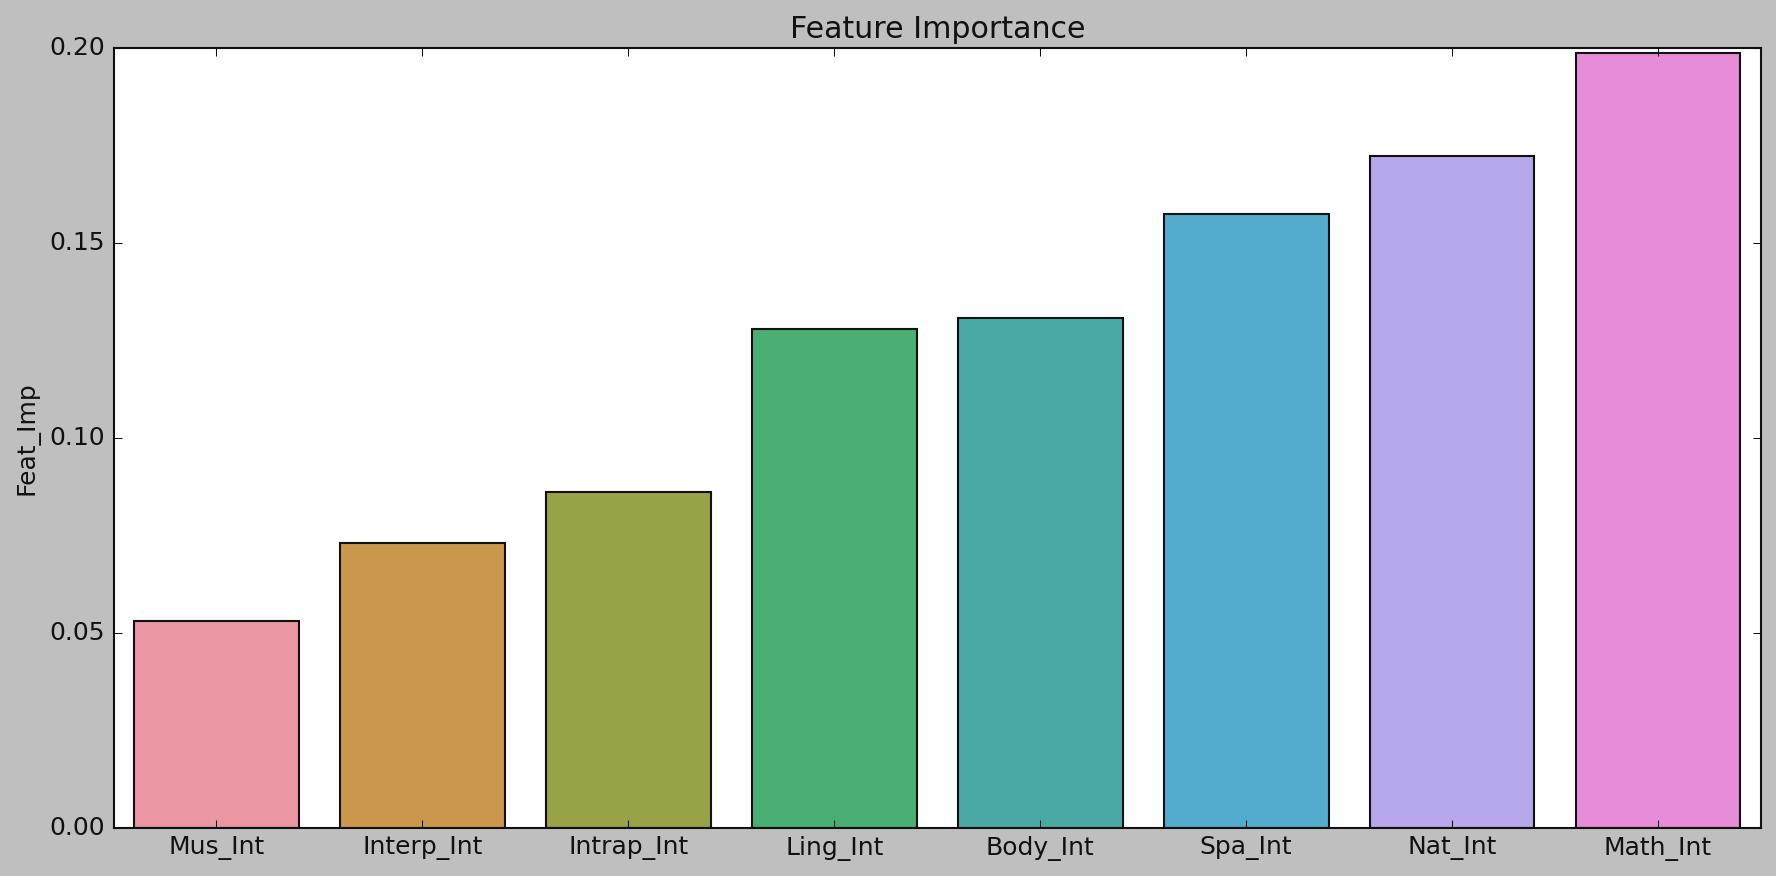

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate
from sklearn.tree import plot_tree

model = RandomForestClassifier(max_depth=3,
                               max_features=4,
                               min_samples_split=5,
                               n_estimators=25,
                               random_state=42)
model.fit(X_train, y_train)

plt.figure(figsize=(12,6),dpi=150)
sns.barplot(x=Feat_Imp.index, y=Feat_Imp["Feat_Imp"])
plt.title("Feature Importance")
plt.tight_layout();

## ALL

### All

In [267]:
all_scrs = pd.concat([lin_mod_scrs,
                      rid_mod_scrs,
                      las_mod_scrs,
                      els_mod_scrs,
                      knnr_mod_scrs,
                      svr_mod_scrs,
                      dtr_mod_scrs,
                      rfr_mod_scrs,
                      Adar_mod_scrs,
                      Grdr_mod_scrs,
                      xgbr_mod_scrs,
                      lgbmr_mod_scrs],
                      axis=1)
#lgbmr_mod_cum_scrs.columns = ["lgbmrm_trn","lgbmrm_tst","lgbmr_cv_scr","lgbmrm_mms_trn","lgbmrm_mms_tst","lgbmr_cv_mms_scr","lgbmrm_ss_trn","lgbmrm_ss_tst","lgbmr_cv_ss_scr"]
all_scrs

,lm_trn,lm_tst,lm_mms_trn,lm_mms_tst,lm_ss_trn,lm_ss_tst,rm_trn,rm_tst,rm_mms_trn,rm_mms_tst,...,xgbrm_mms_trn,xgbrm_mms_tst,xgbrm_ss_trn,xgbrm_ss_tst,lgbmrm_trn,lgbmrm_tst,lgbmrm_mms_trn,lgbmrm_mms_tst,lgbmrm_ss_trn,lgbmrm_ss_tst
rmse,11.866705,12.443221,11.866705,12.443221,11.866705,12.443221,11.866706,12.442072,11.876752,12.323480,...,9.102535,11.982605,9.102535,11.980123,11.696354,12.062363,11.696354,12.062363,11.696354,12.062363
R2,0.023046,-0.135987,0.023046,-0.135987,0.023046,-0.135987,0.023046,-0.135777,0.021391,-0.114229,...,0.425171,-0.053441,0.425171,-0.053005,0.050894,-0.067511,0.050894,-0.067511,0.050894,-0.067511
mae,10.110832,11.230958,10.110832,11.230958,10.110832,11.230958,10.111488,11.230004,10.184354,11.119722,...,7.100905,10.301390,7.100905,10.297643,10.070134,10.642544,10.070134,10.642544,10.070134,10.642544
mse,140.818691,154.833760,140.818691,154.833760,140.818691,154.833760,140.818708,154.805150,141.057235,151.868147,...,82.856141,143.582819,82.856141,143.523355,136.804689,145.500592,136.804689,145.500592,136.804689,145.500592


In [268]:
all_scrs = all_scrs.T
all_scrs	

,rmse,R2,mae,mse
lm_trn,11.866705,0.023046,10.110832,140.818691
lm_tst,12.443221,-0.135987,11.230958,154.833760
lm_mms_trn,11.866705,0.023046,10.110832,140.818691
lm_mms_tst,12.443221,-0.135987,11.230958,154.833760
lm_ss_trn,11.866705,0.023046,10.110832,140.818691
...,...,...,...,...
lgbmrm_tst,12.062363,-0.067511,10.642544,145.500592
lgbmrm_mms_trn,11.696354,0.050894,10.070134,136.804689
lgbmrm_mms_tst,12.062363,-0.067511,10.642544,145.500592
lgbmrm_ss_trn,11.696354,0.050894,10.070134,136.804689


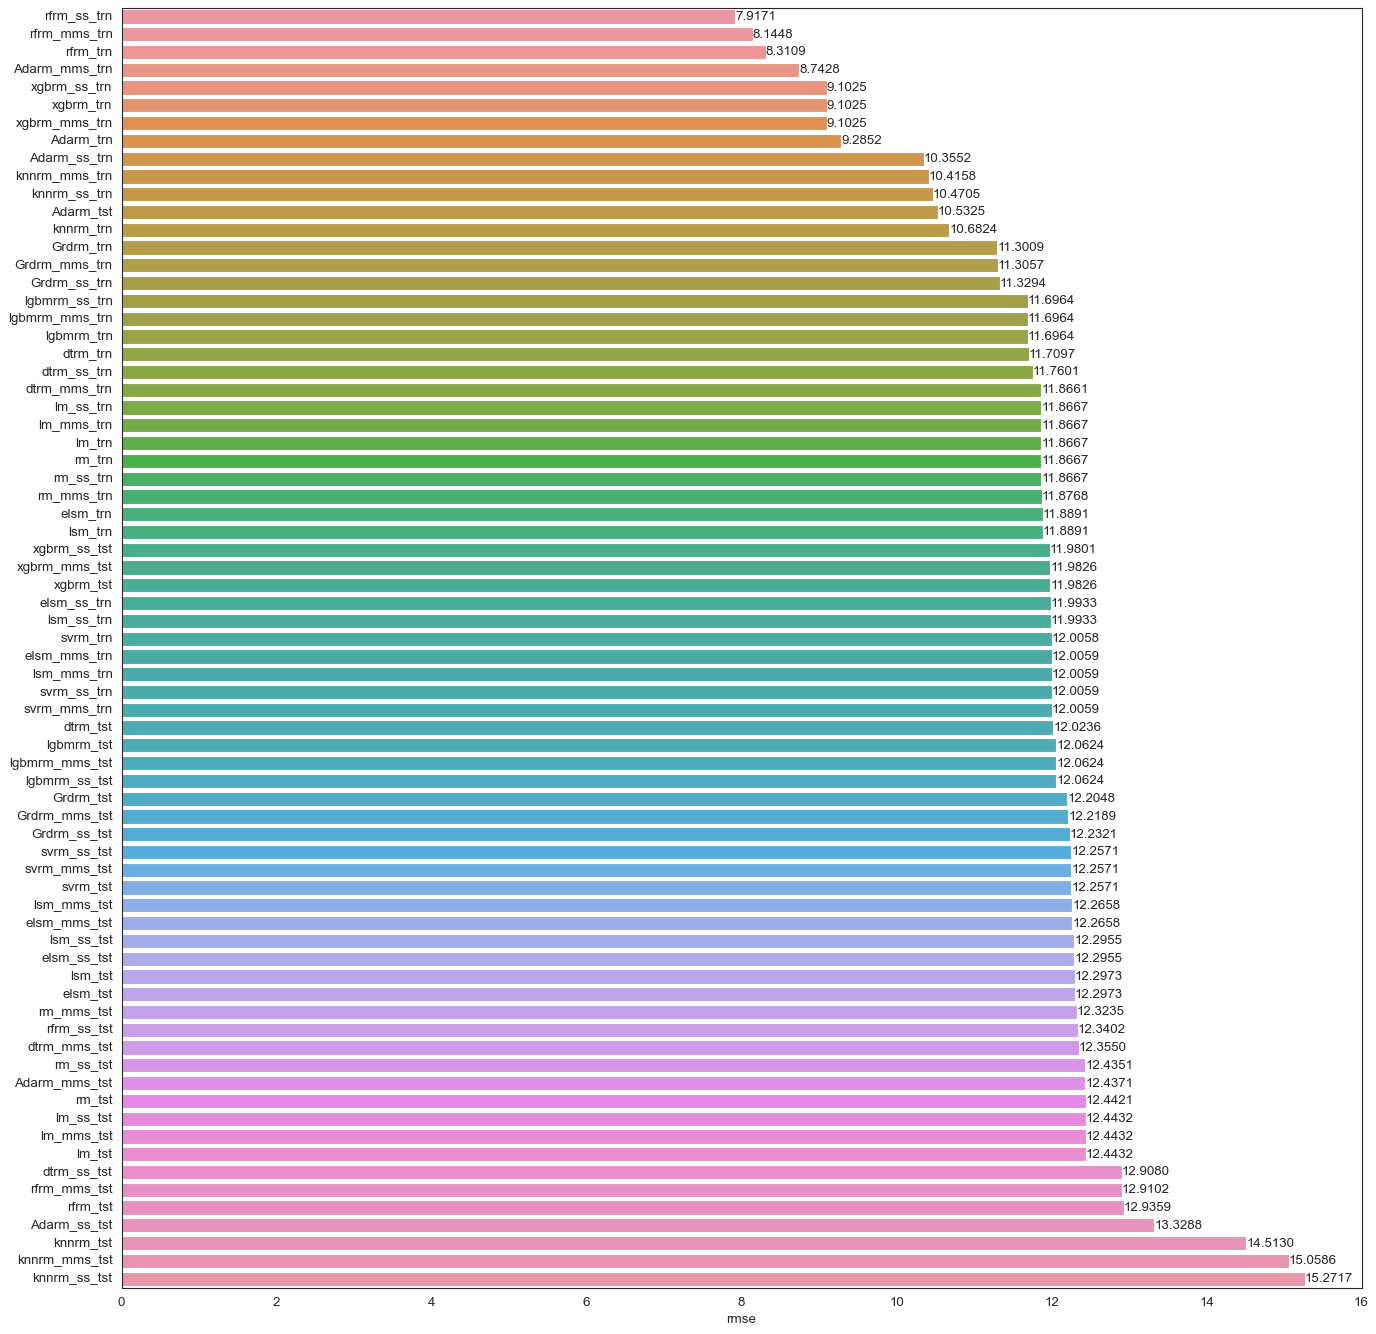

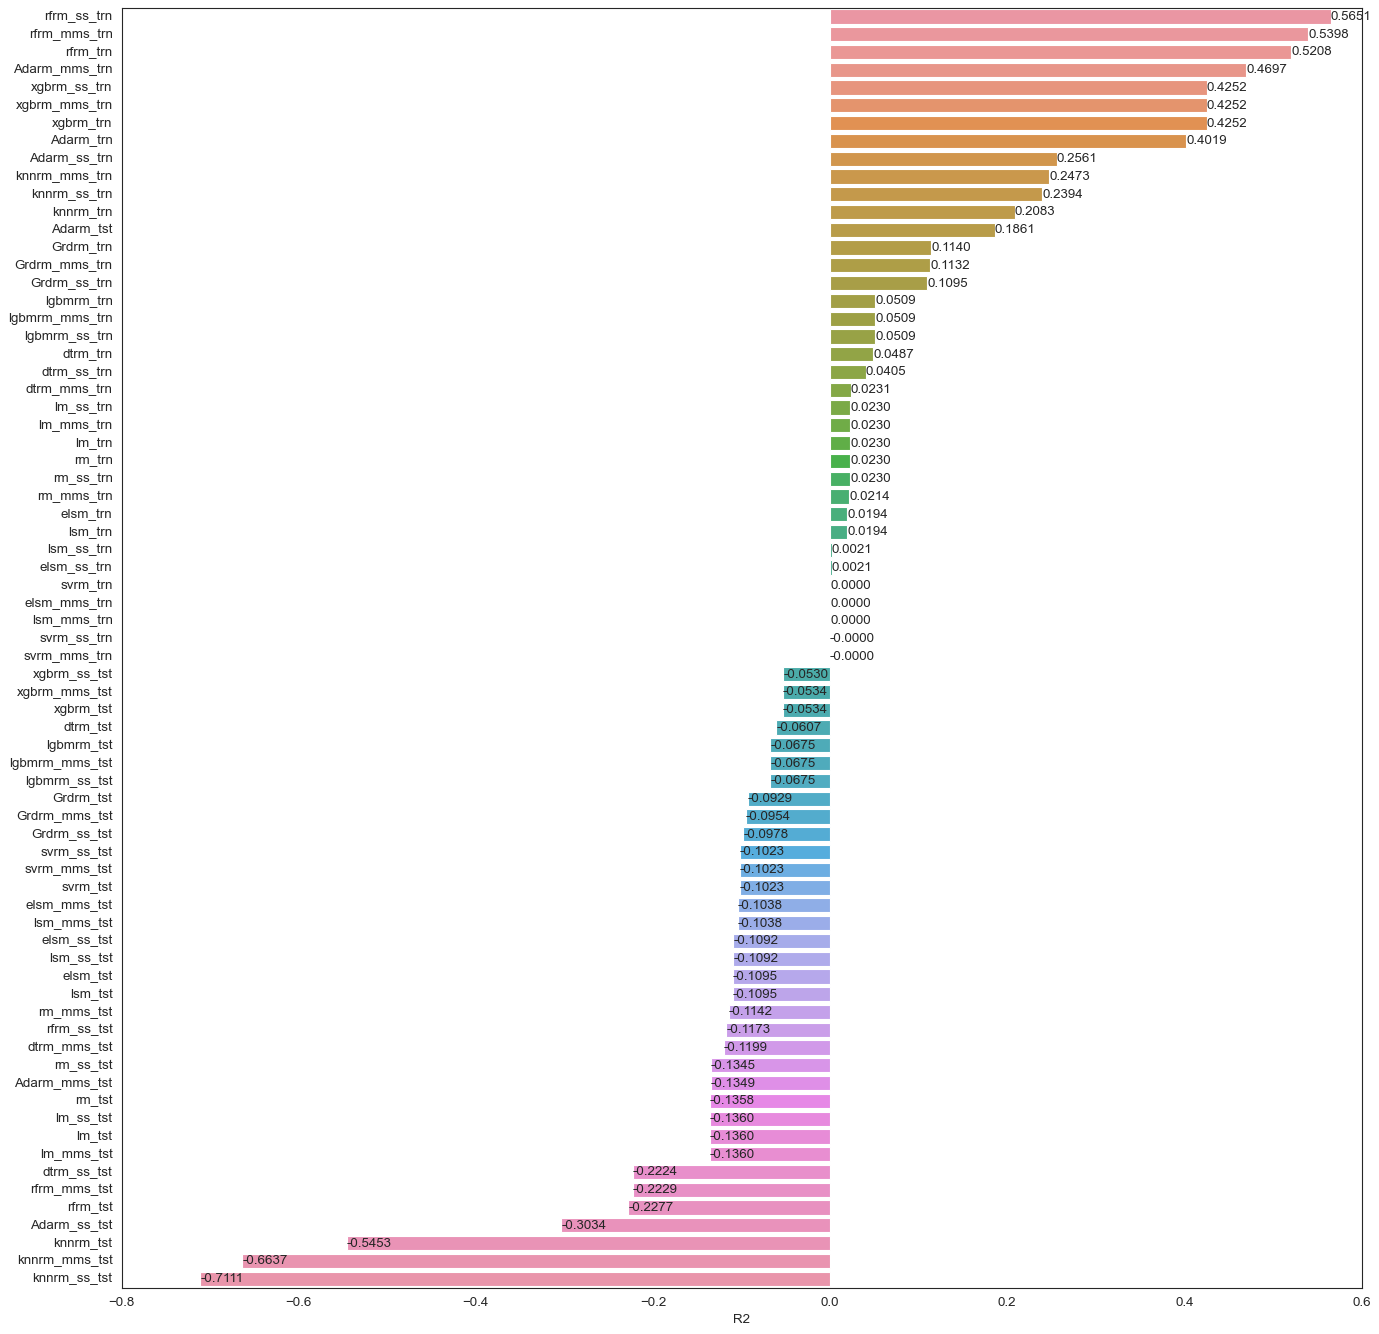

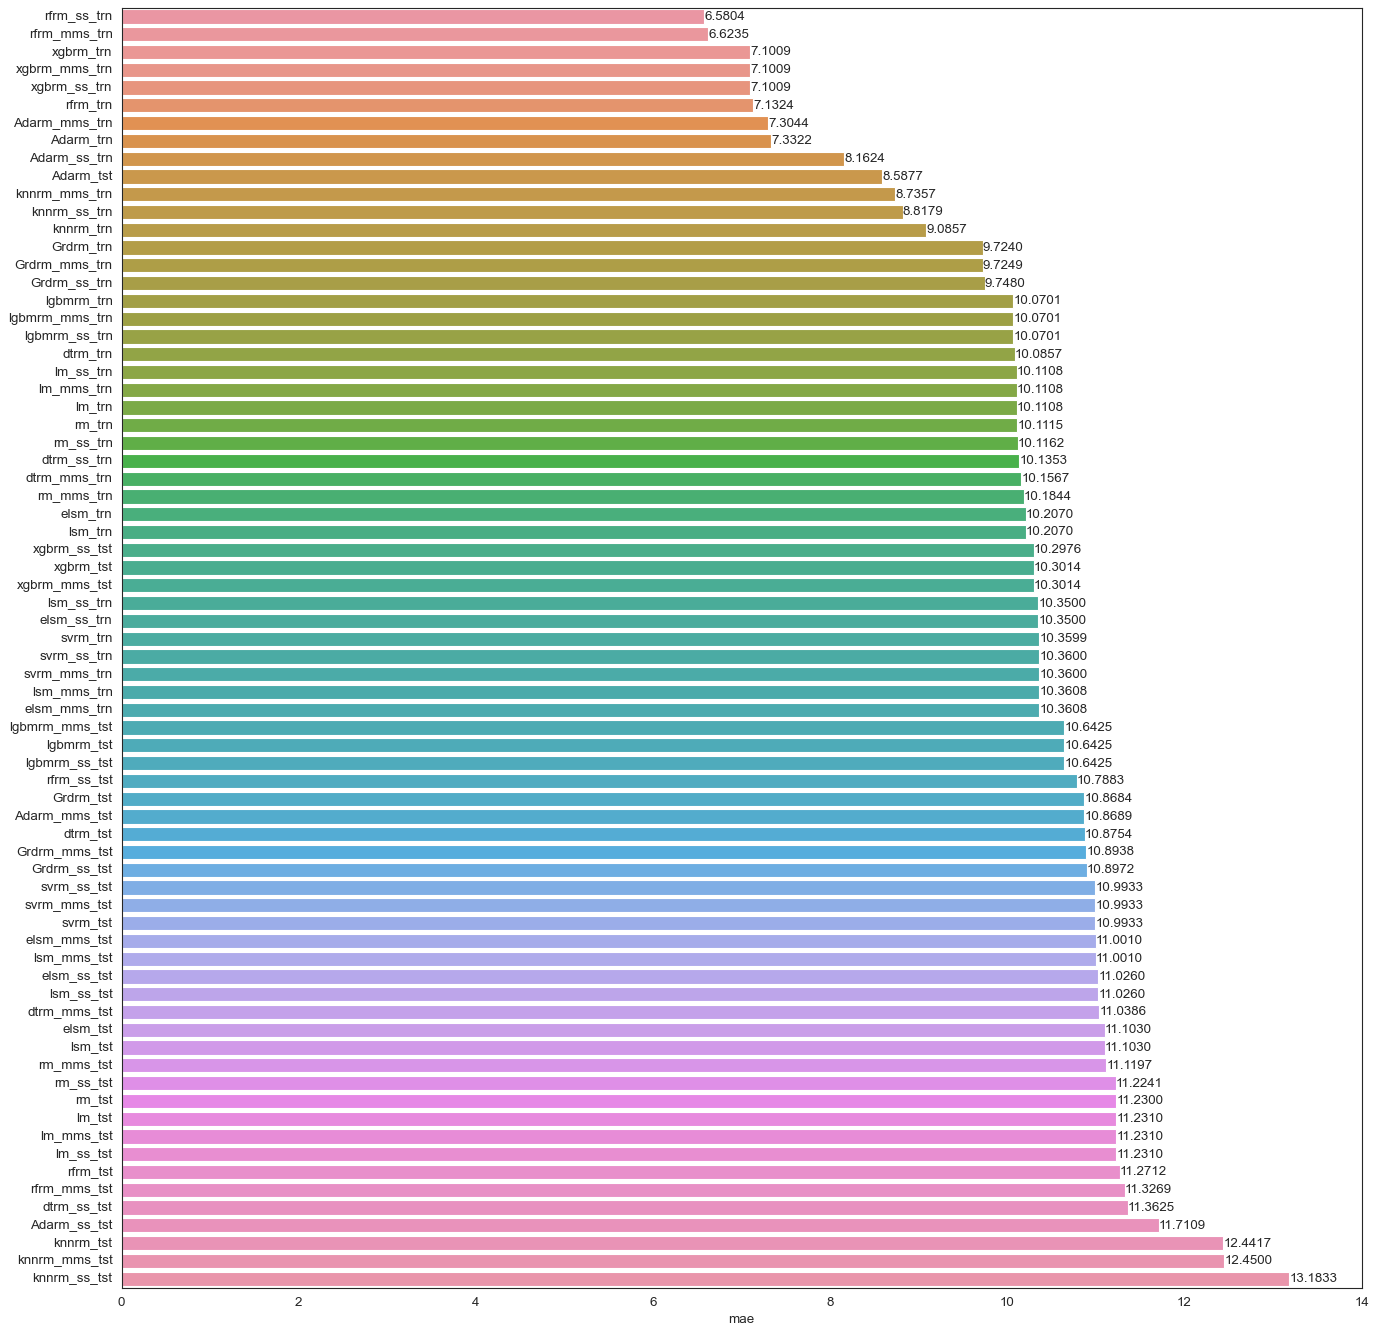

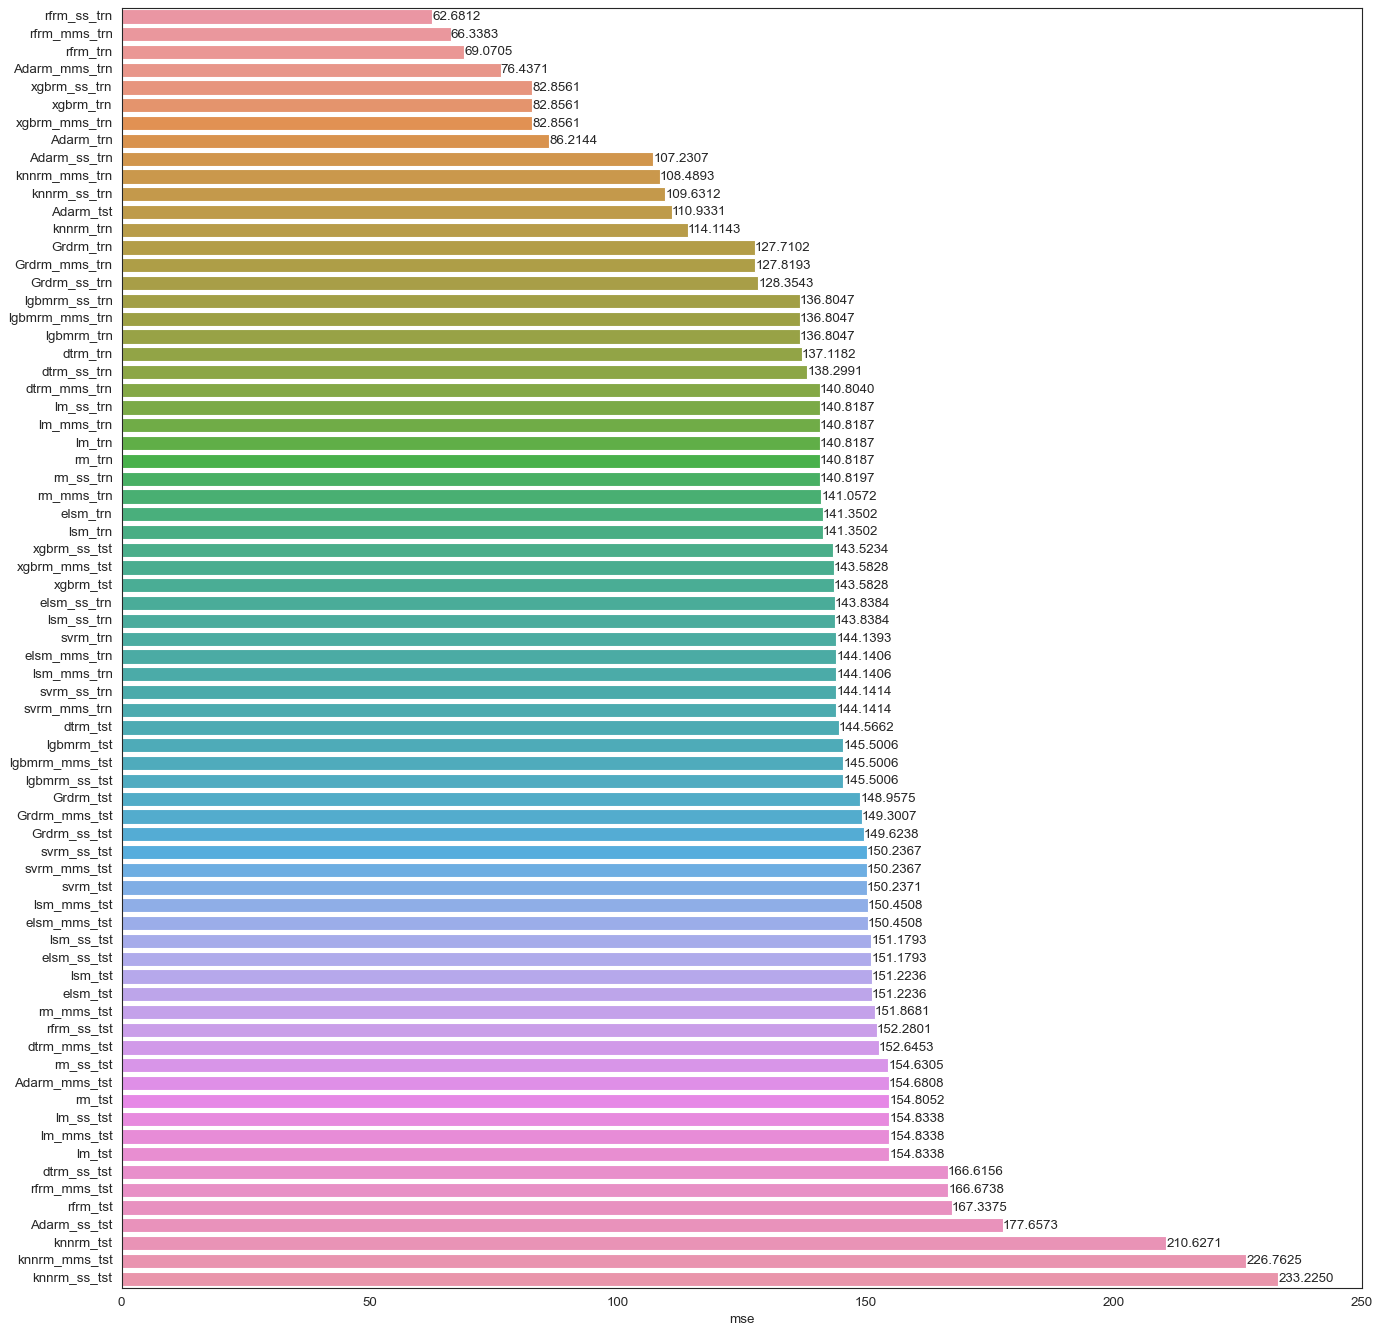

In [269]:
plt.style.use('classic')
sns.set_style("white")
metrics = all_scrs.columns
for i,j in enumerate(metrics):
    plt.figure(i, figsize=(20,20))
    if j == "R2":
        ascending = False
    else:
        ascending = True
    compare = all_scrs.sort_values(by=j, ascending=ascending)
    ax = sns.barplot(x = compare[j] , y= compare.index)
    for p in ax.patches:
            width = p.get_width()                        # get bar length
            ax.text(width,                               # set the text at 1 unit right of the bar
                    p.get_y() + p.get_height() / 2,      # get Y coordinate + X coordinate / 2
                    '{:.4f}'.format(width),             # set variable to display, 2 decimals
                    ha = 'left',                         # horizontal alignment
                    va = 'center') 
plt.tight_layout;

## Final Model / Predict

In [270]:
from sklearn.ensemble import RandomForestRegressor

final_model = RandomForestRegressor(max_depth=None,
                                    max_features="log2",
                                    min_samples_leaf=3,
                                    min_samples_split=2,
                                    n_estimators=15)

final_model.fit(X_reg, y_reg)

RandomForestRegressor(max_features='log2', min_samples_leaf=3, n_estimators=15)

In [271]:
columns_name = X_reg.columns

In [272]:
pred = [[35, 36, 34, 37, 15, 17, 19, 21]]
pred_data = pd.DataFrame(data=pred, columns=columns_name)
pred_data

,Ling_Int,Math_Int,Spa_Int,Mus_Int,Nat_Int,Body_Int,Interp_Int,Intrap_Int
0,35,36,34,37,15,17,19,21


In [273]:
predictions = round(final_model.predict(pred_data)[0], 1)
predictions

71.7

In [274]:
MI_Cat = columns_name[np.argmax(pred_data)]
MI_Score = max(pred[0])
Flight_Score = predictions

if Flight_Score >= 70:
    print(f"MI_Cat\t\t: {MI_Cat}\nMI_Score\t: {MI_Score}\nFlight_Score\t: {Flight_Score}\nResult\t\t: Pilot")
if Flight_Score < 70:
    print(f"MI_Cat\t\t: {MI_Cat}\nMI_Score\t: {MI_Score}\nFlight_Score\t: {Flight_Score}\nResult\t\t: Not Pilot")

MI_Cat		: Mus_Int
MI_Score	: 37
Flight_Score	: 71.7
Result		: Pilot
